In [1]:
import pymongo

In [2]:
client = pymongo.MongoClient('mongodb://localhost:27017/')
db = client["IDS_2017"]

In [3]:
collections = [cl for cl in db.list_collection_names() if cl.endswith("Session")]

In [4]:
collections

['Friday-WorkingHours-Session',
 'Thursday-WorkingHours-Session',
 'Tuesday-WorkingHours-Session',
 'Wednesday-WorkingHours-Session']

In [5]:
for collection in collections:
    print(collection)
    labels = db[collection].distinct("label")
    for label in labels:
        print(label + ": " + str(db[collection].find({"label": label}, {"_id": 0}).count()))
    print()

Friday-WorkingHours-Session


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """


BENIGN: 44661
Bot: 123
DDoS: 86237
PortScan: 125

Thursday-WorkingHours-Session
BENIGN: 36040
Infiltration: 2
Web Attack  Brute Force: 145
Web Attack  Sql Injection: 9
Web Attack  XSS: 23

Tuesday-WorkingHours-Session
BENIGN: 41000
FTP-Patator: 2117

Wednesday-WorkingHours-Session
BENIGN: 48504
DoS GoldenEye: 6994
DoS Hulk: 145781
DoS Slowhttptest: 840
DoS slowloris: 938



In [7]:
import sys
sys.path.append("../")

import os

import config

In [10]:
for file_name in os.listdir(config.csv_dir):
    if file_name.endswith(".csv"):
        print(file_name)
        file_name = os.path.join(config.csv_dir, file_name)
        dic = dict()
        with open(file_name, "r", encoding="utf-8", errors = "ignore") as fr:
            for line in fr:
                line = line.rstrip().split(",")
                dic[line[-1]] = dic.get(line[-1], 0) + 1
        print(dic)

Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
{' Label': 1, 'BENIGN': 97718, 'DDoS': 128027}
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
{' Label': 1, 'BENIGN': 127537, 'PortScan': 158930}
Friday-WorkingHours-Morning.pcap_ISCX.csv
{' Label': 1, 'BENIGN': 189067, 'Bot': 1966}
Monday-WorkingHours.pcap_ISCX.csv
{' Label': 1, 'BENIGN': 529918}
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
{' Label': 1, 'BENIGN': 288566, 'Infiltration': 36}
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
{' Label': 1, 'BENIGN': 168186, 'Web Attack  Brute Force': 1507, 'Web Attack  XSS': 652, 'Web Attack  Sql Injection': 21, '': 288602}
Tuesday-WorkingHours.pcap_ISCX.csv
{' Label': 1, 'BENIGN': 432074, 'FTP-Patator': 7938, 'SSH-Patator': 5897}
Wednesday-workingHours.pcap_ISCX.csv
{' Label': 1, 'BENIGN': 440031, 'DoS slowloris': 5796, 'DoS Slowhttptest': 5499, 'DoS Hulk': 231073, 'DoS GoldenEye': 10293, 'Heartbleed': 11}


In [5]:
output = {}

In [4]:
from tqdm import tqdm

In [13]:
for collection in collections:
    print(collection)
    dic = {}
    labels = db[collection].distinct("label")
    for label in labels:
        dic[label] = {}
        sessions = db[collection].find({"label": label}, {"_id": 0})
        for idx, session in enumerate(sessions):
            dic[label][len(session["bytes"])] = dic[label].get(len(session["bytes"]), 0) + 1
    output[collection] = dic    

Friday-WorkingHours-Session
Thursday-WorkingHours-Session
Tuesday-WorkingHours-Session
Wednesday-WorkingHours-Session


In [14]:
output

{'Friday-WorkingHours-Session': {'BENIGN': {10: 2681,
   13: 2026,
   11: 999,
   18: 1273,
   16: 2597,
   32: 374,
   23: 1146,
   33: 501,
   82: 55,
   12: 821,
   15: 4057,
   14: 4319,
   17: 1296,
   19: 1663,
   36: 278,
   38: 336,
   22: 923,
   20: 1190,
   24: 833,
   21: 1332,
   8: 4,
   9: 6,
   29: 553,
   27: 584,
   28: 513,
   26: 681,
   45: 371,
   49: 203,
   101: 50,
   39: 425,
   50: 207,
   154: 18,
   137: 14,
   35: 301,
   56: 101,
   37: 322,
   48: 277,
   84: 59,
   65: 74,
   44: 682,
   305: 1,
   257: 7,
   42: 402,
   52: 207,
   46: 309,
   47: 222,
   34: 617,
   40: 428,
   53: 145,
   55: 138,
   67: 84,
   76: 51,
   31: 393,
   51: 164,
   59: 101,
   43: 417,
   61: 94,
   71: 66,
   41: 378,
   57: 95,
   88: 45,
   367: 2,
   70: 85,
   77: 70,
   60: 86,
   62: 101,
   94: 41,
   90: 39,
   361: 3,
   86: 39,
   1183: 1,
   25: 756,
   72: 52,
   75: 40,
   2059: 1,
   118: 26,
   92: 48,
   175: 15,
   66: 78,
   232: 6,
   54: 150,
   74:

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib

In [16]:
matplotlib.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False 

In [17]:
from collections import Counter

In [18]:
import os
pre_picture_path = "../pictures"

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


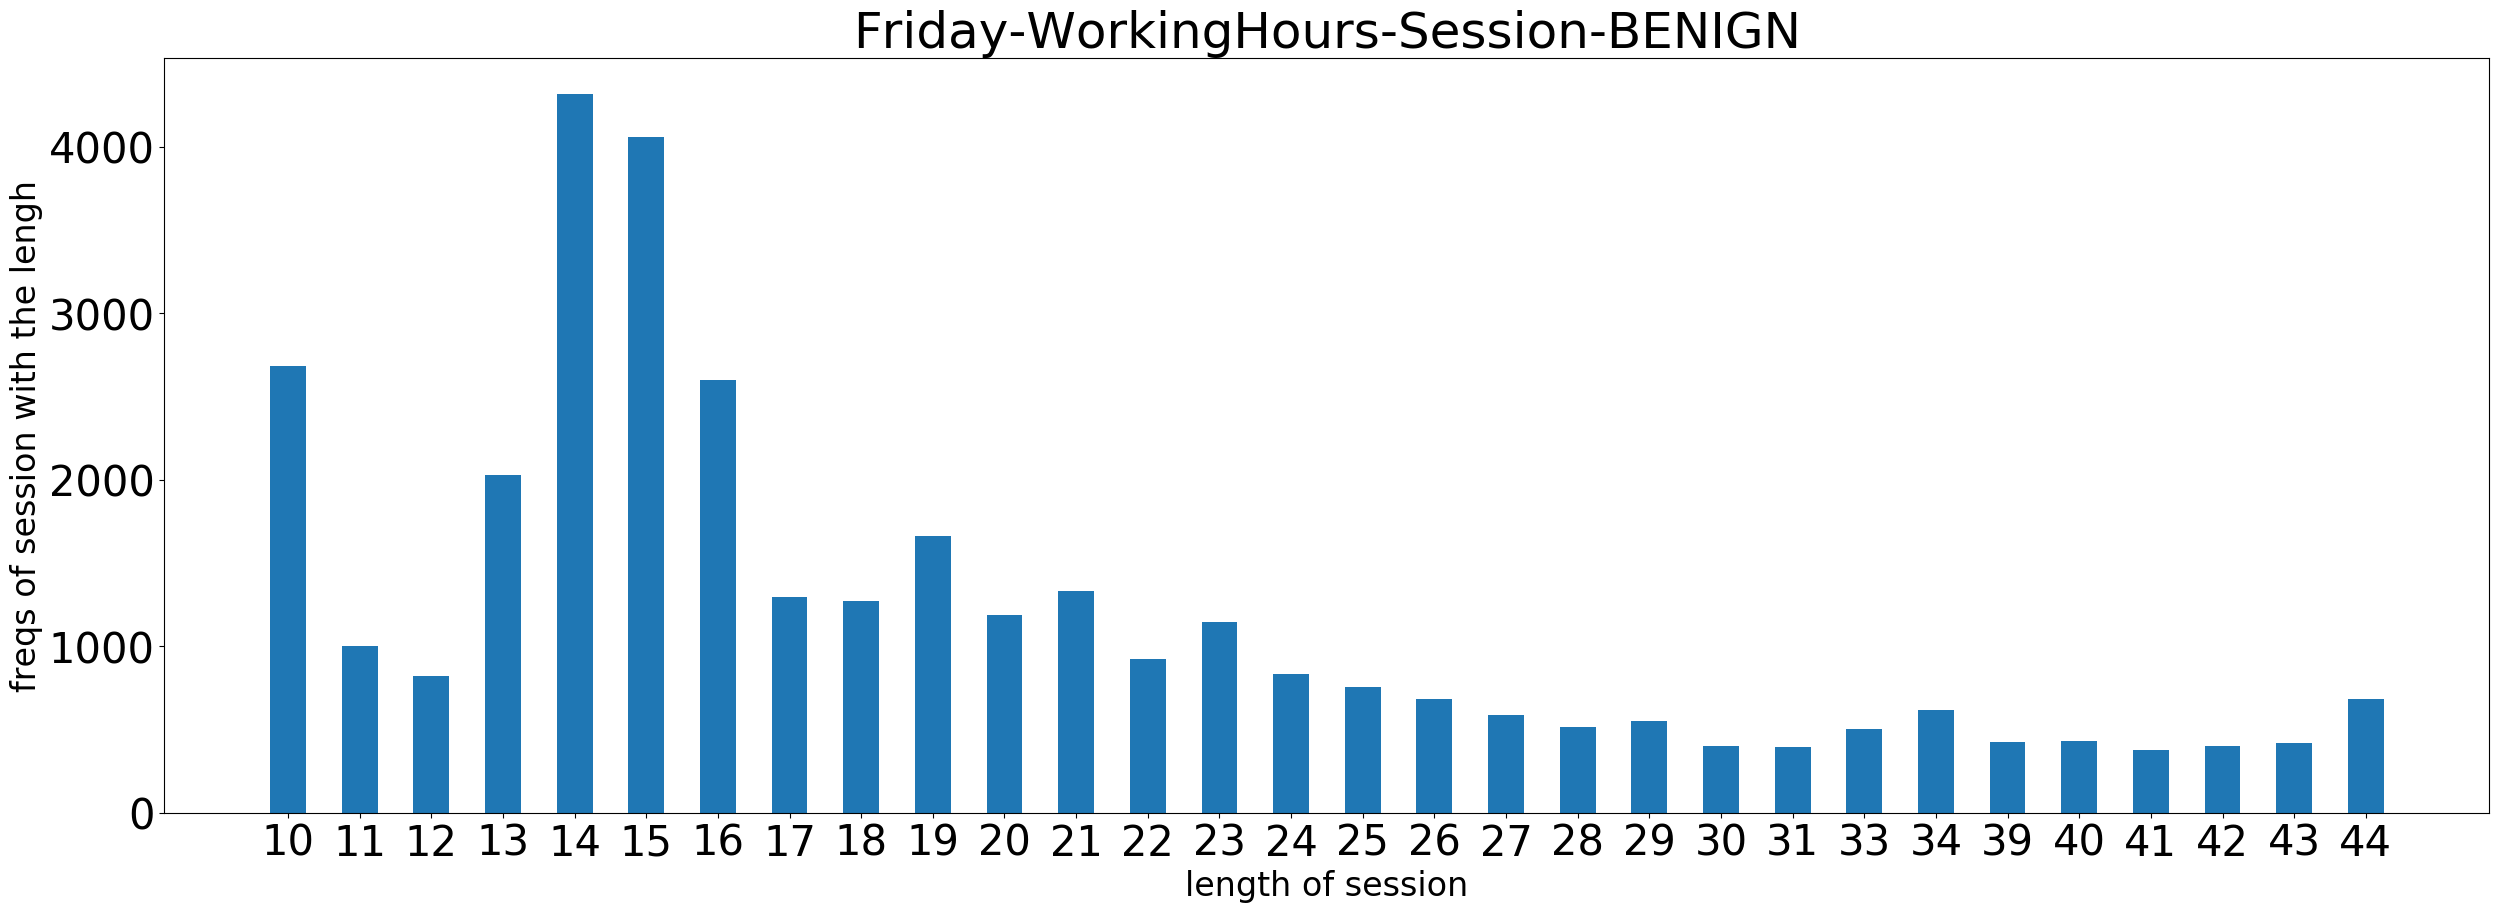

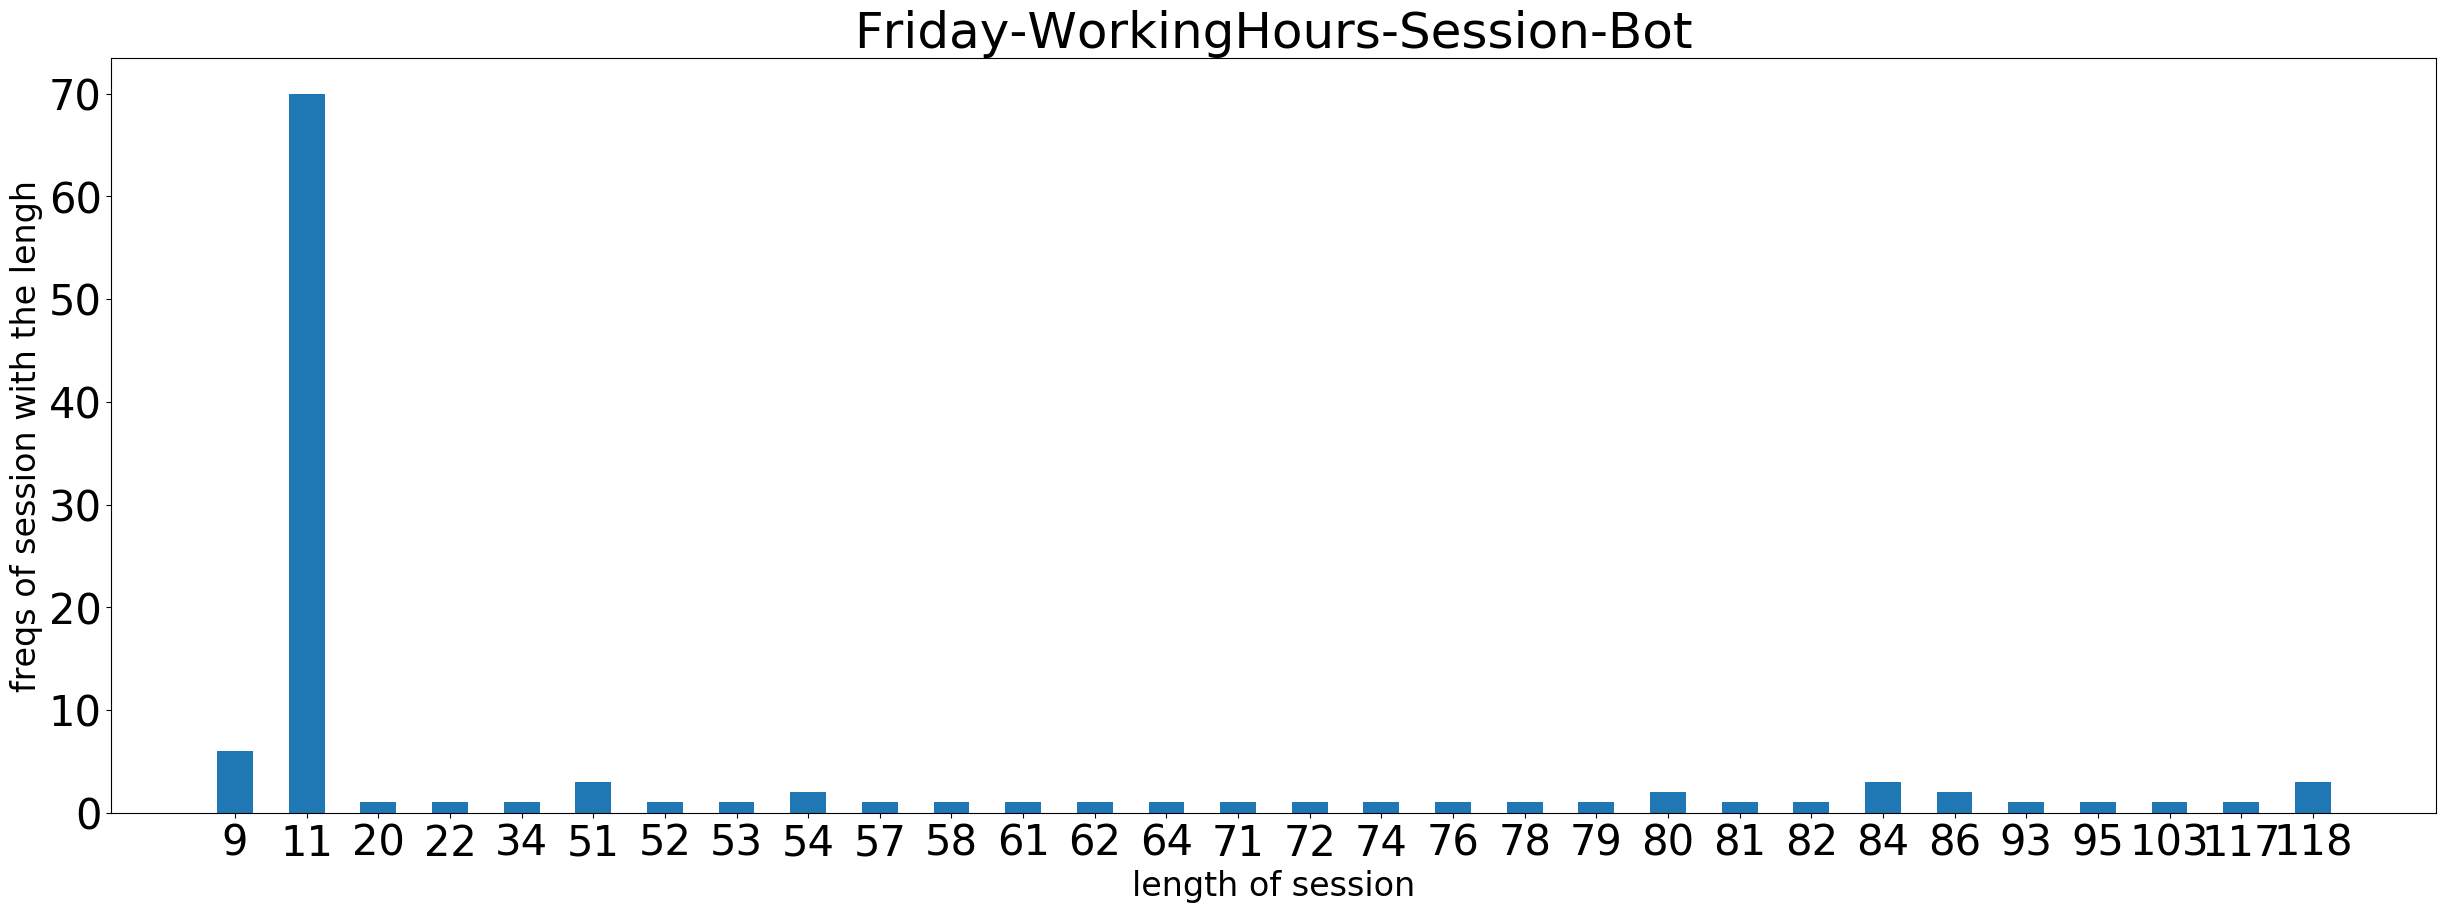

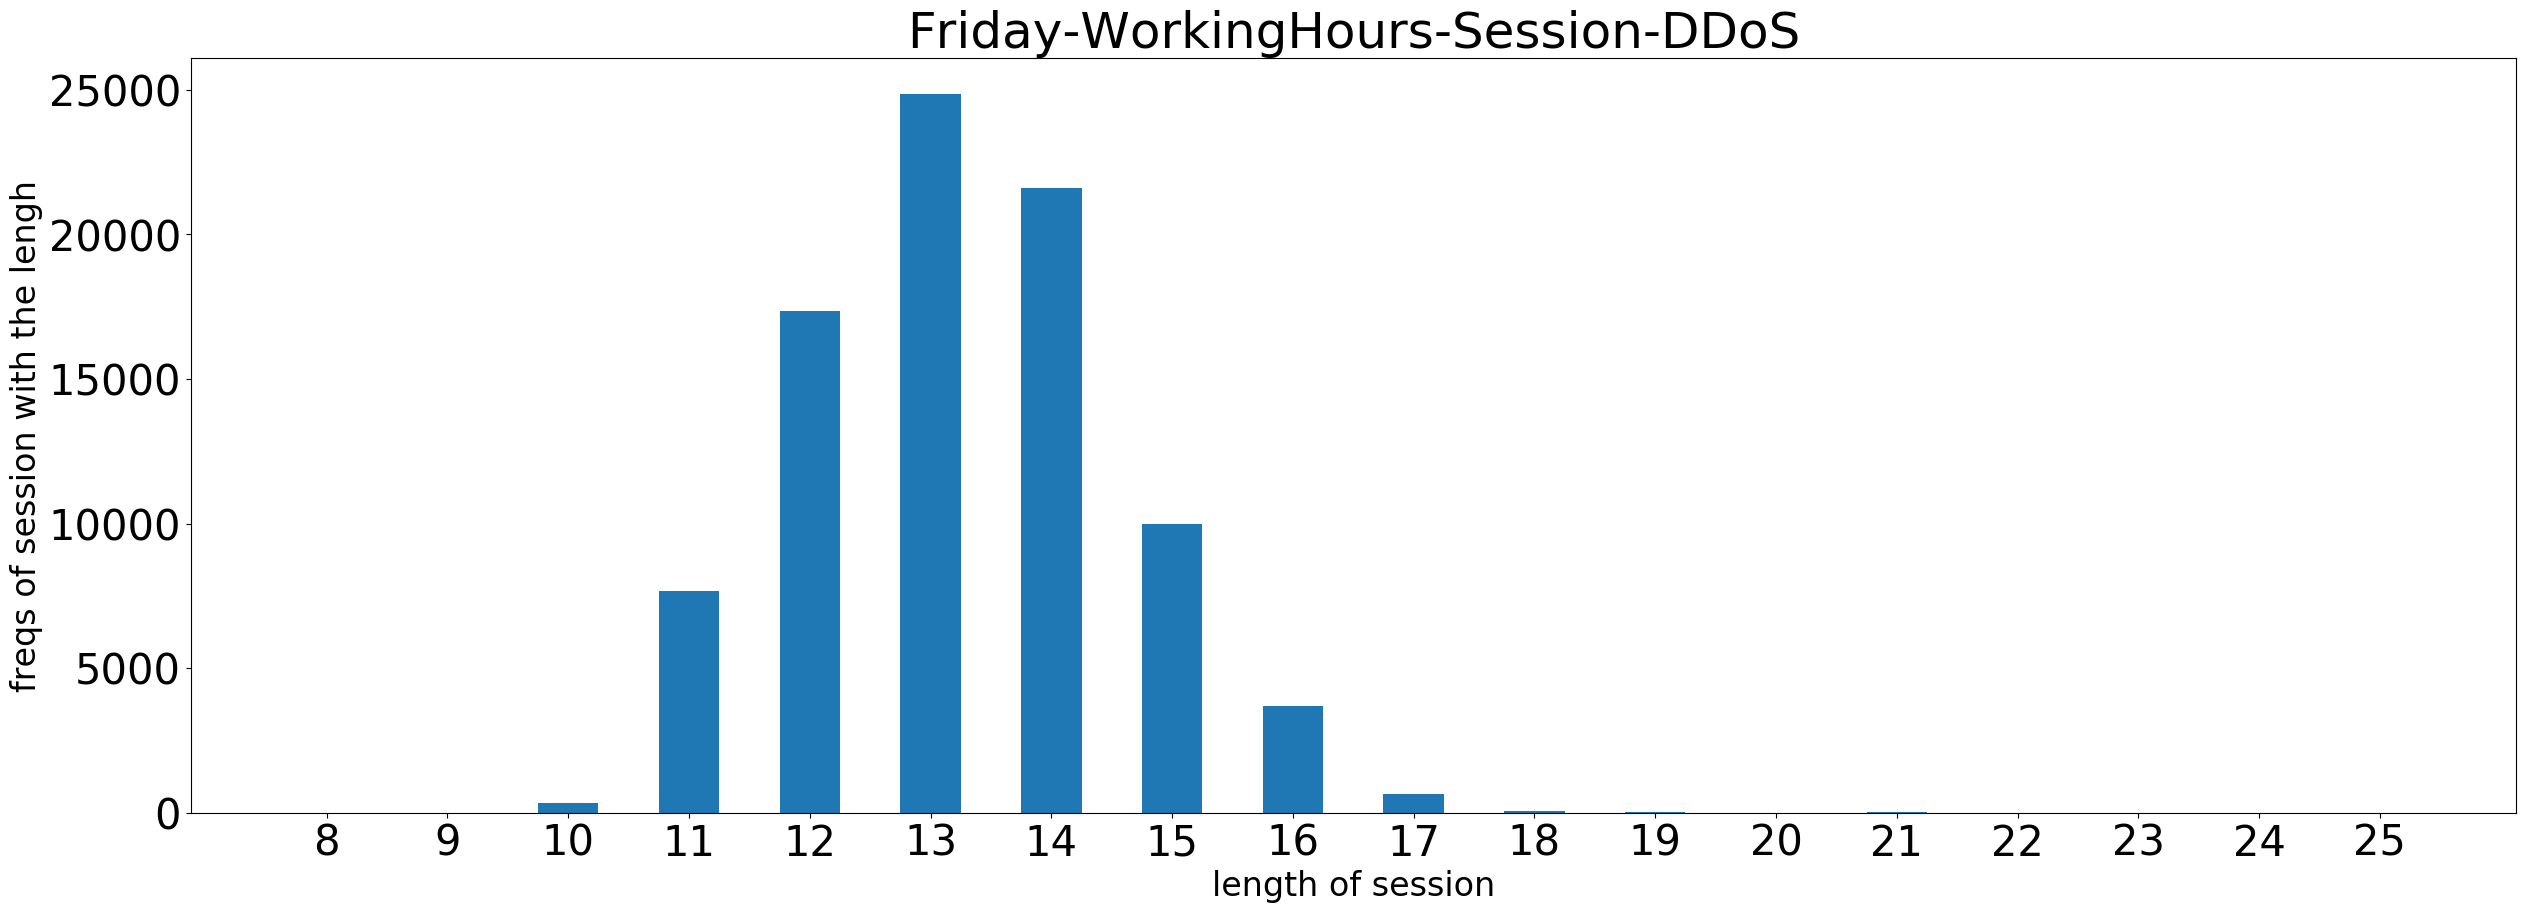

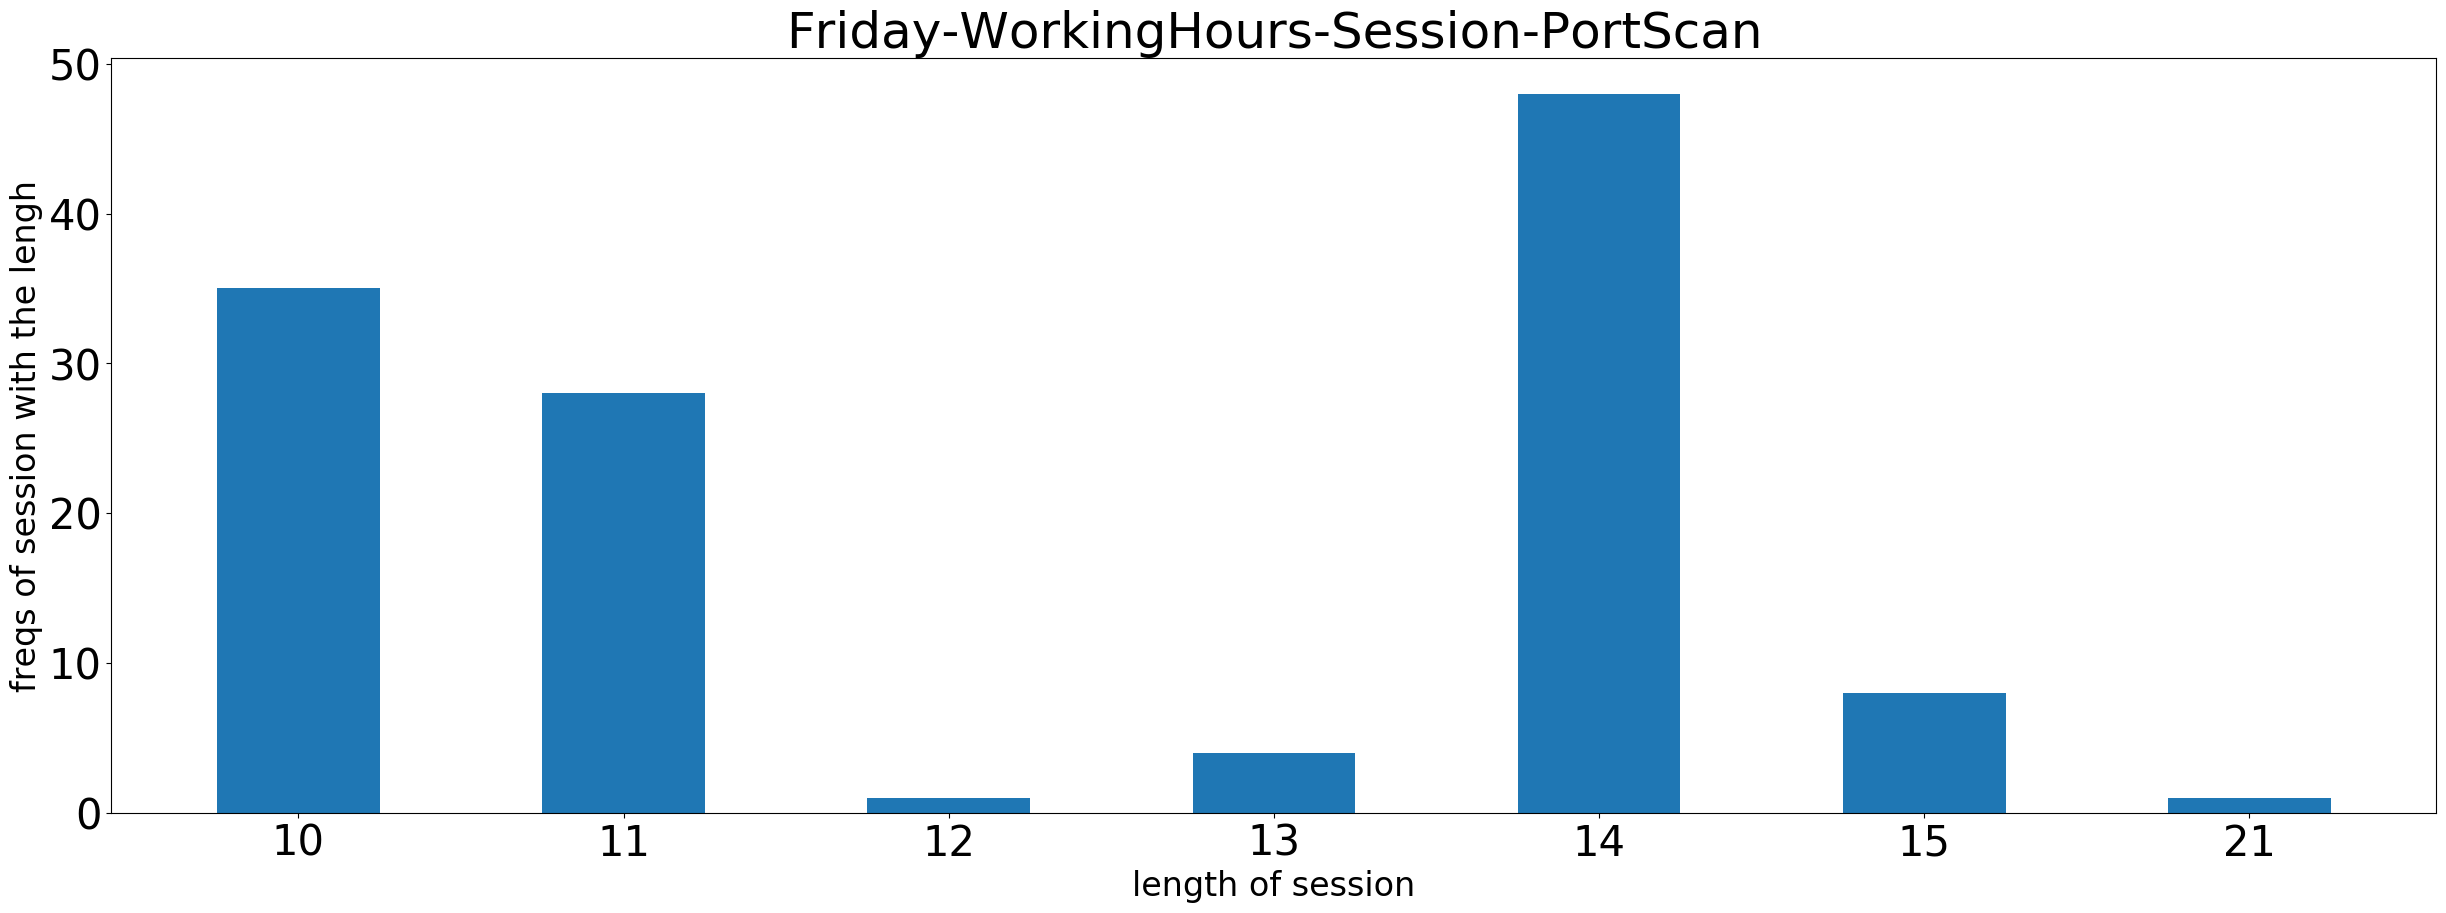

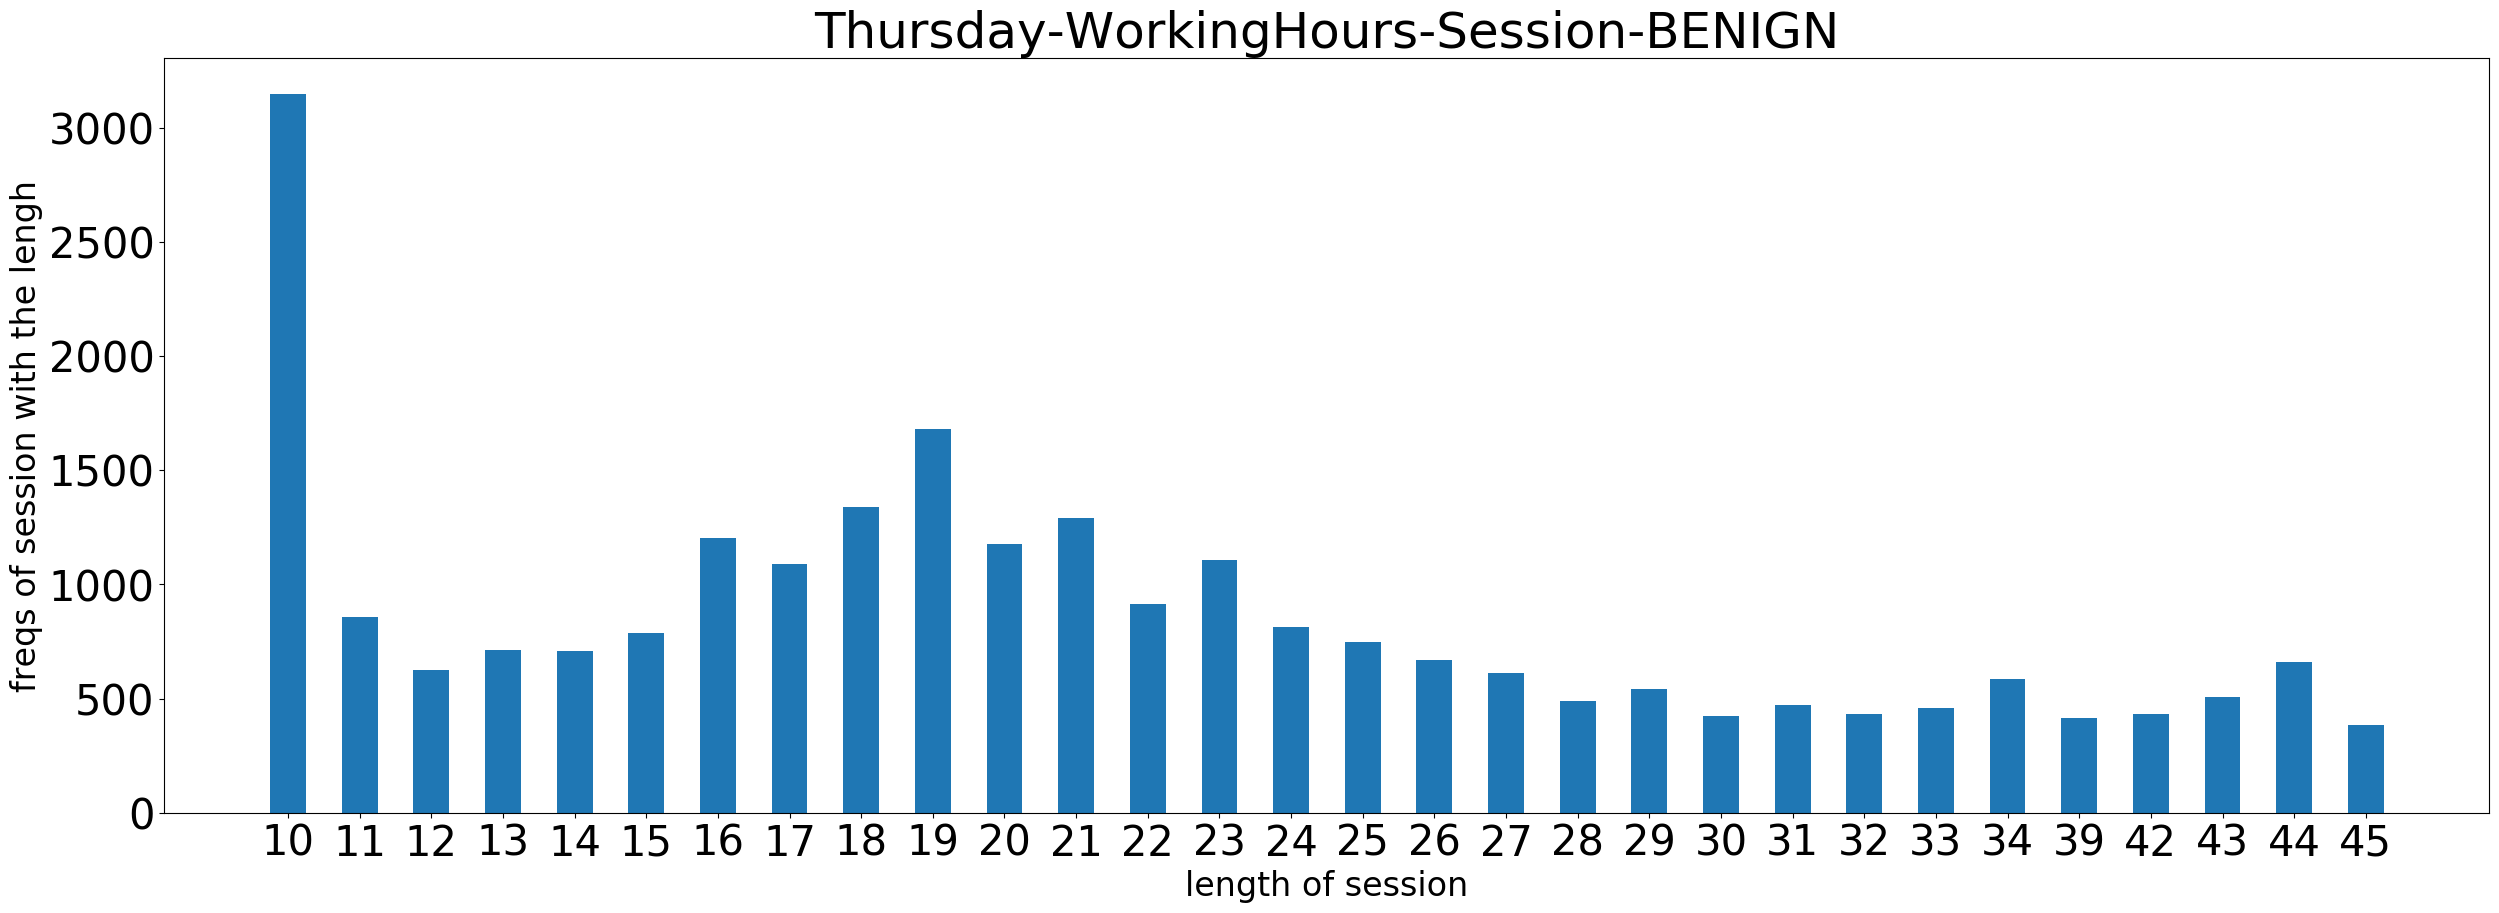

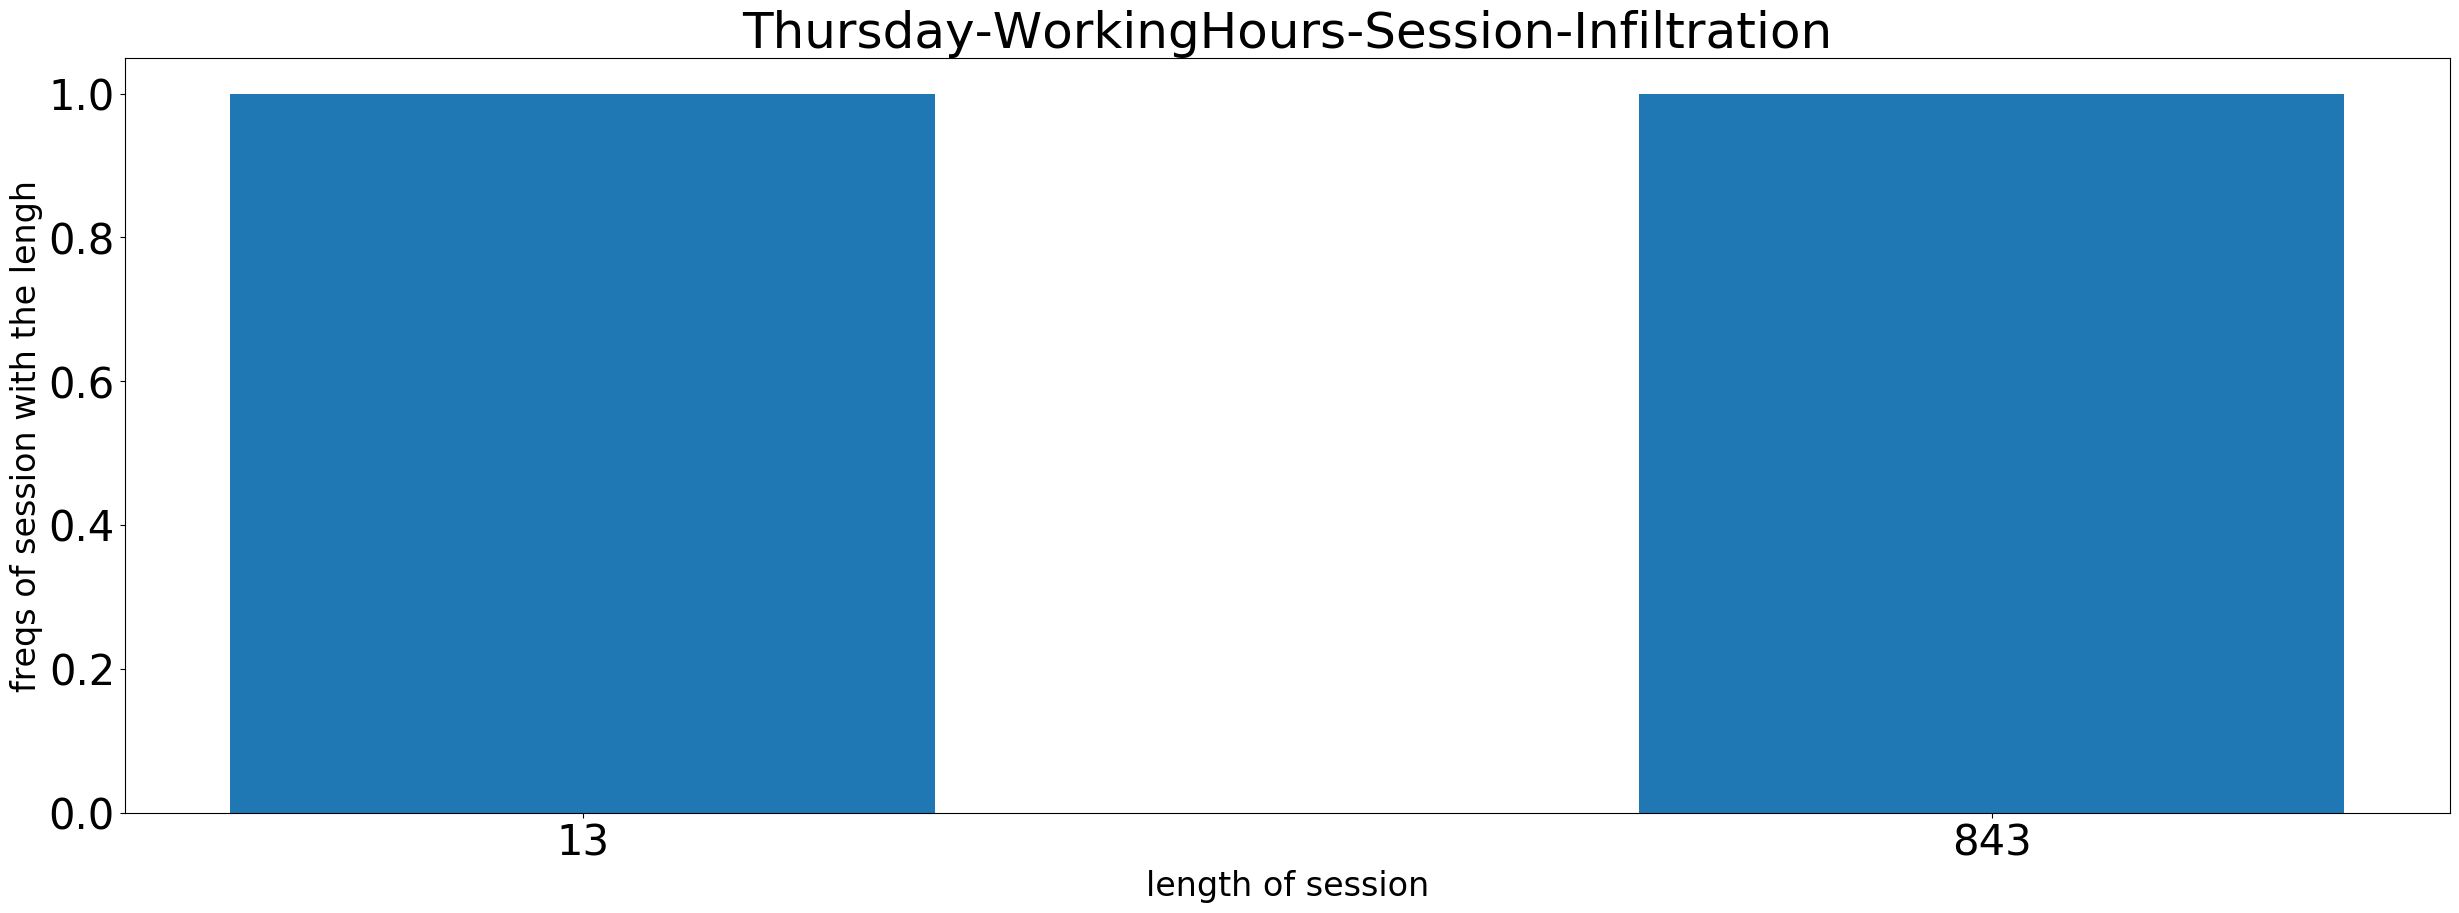

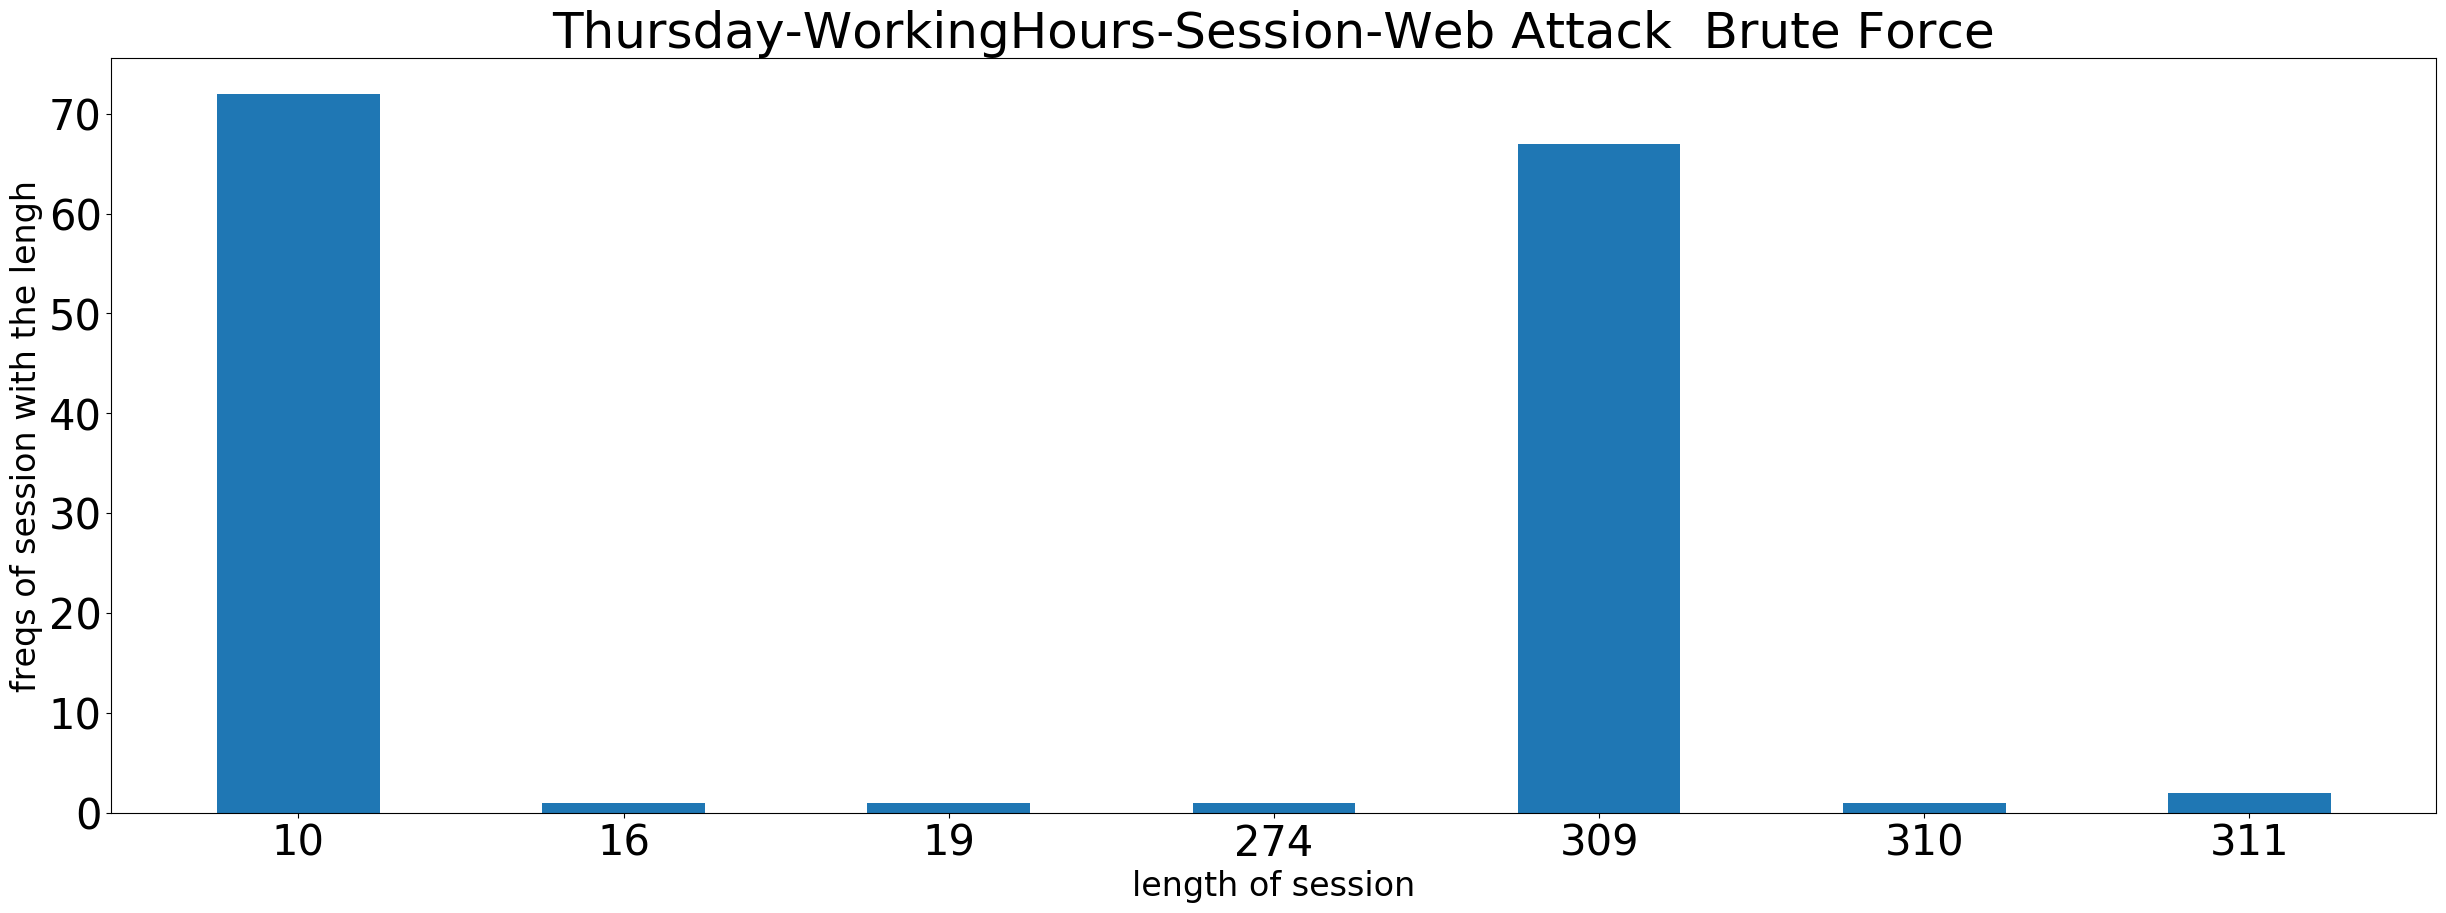

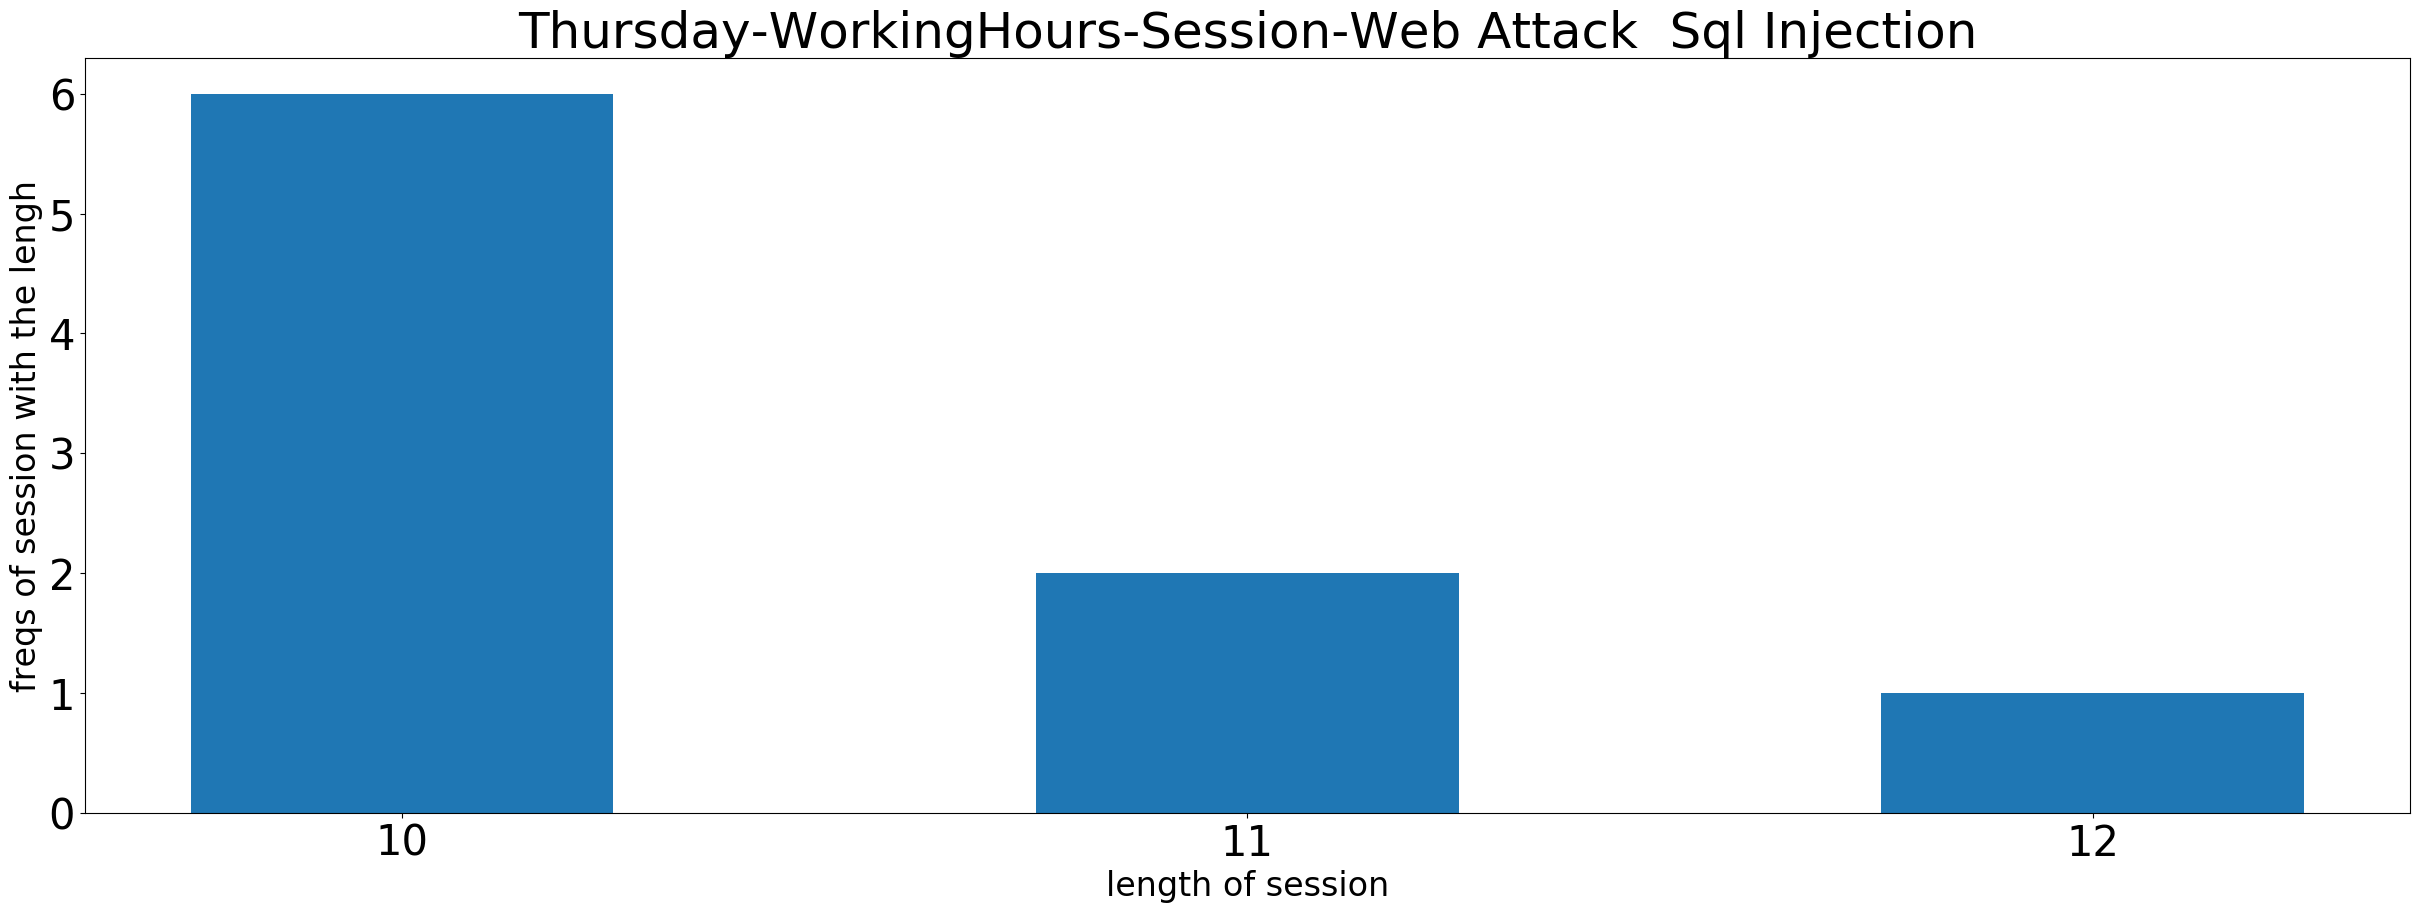

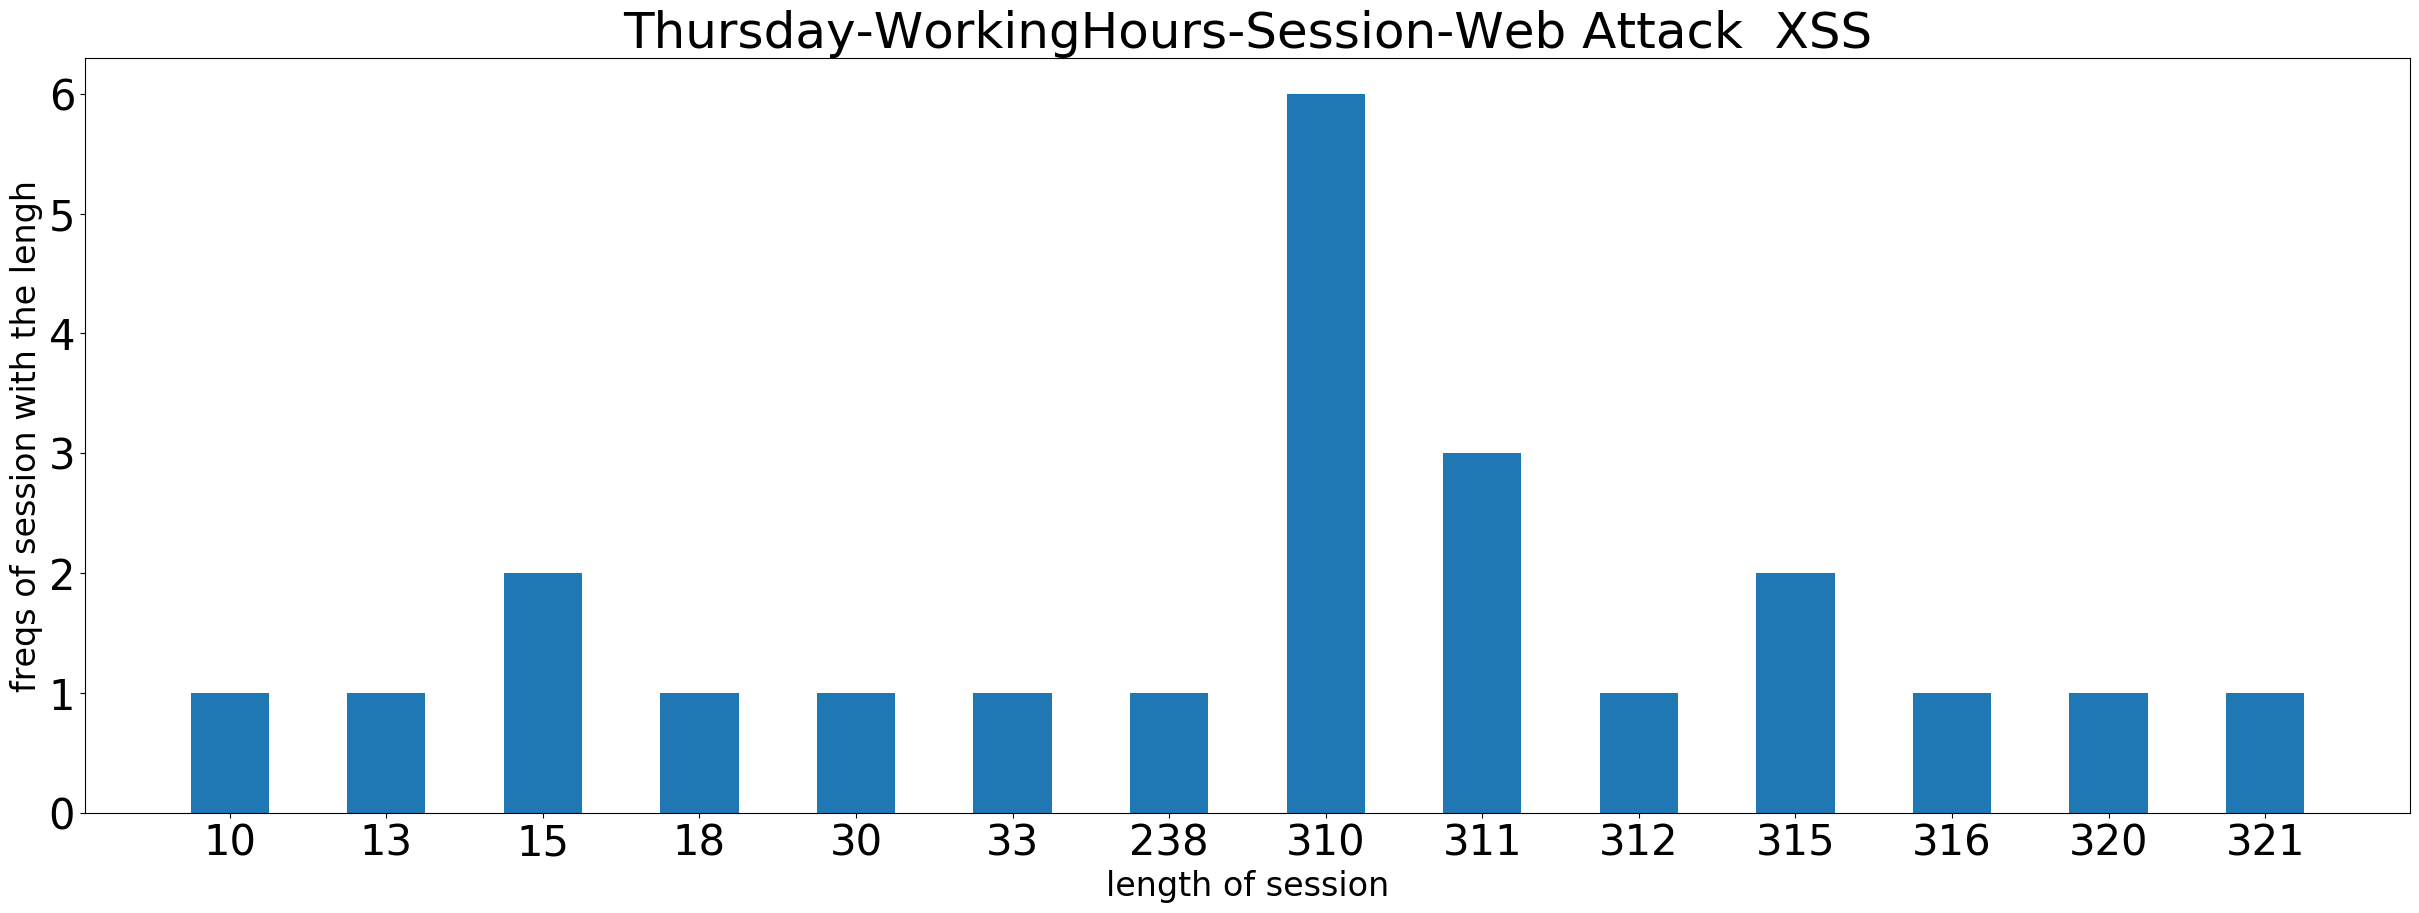

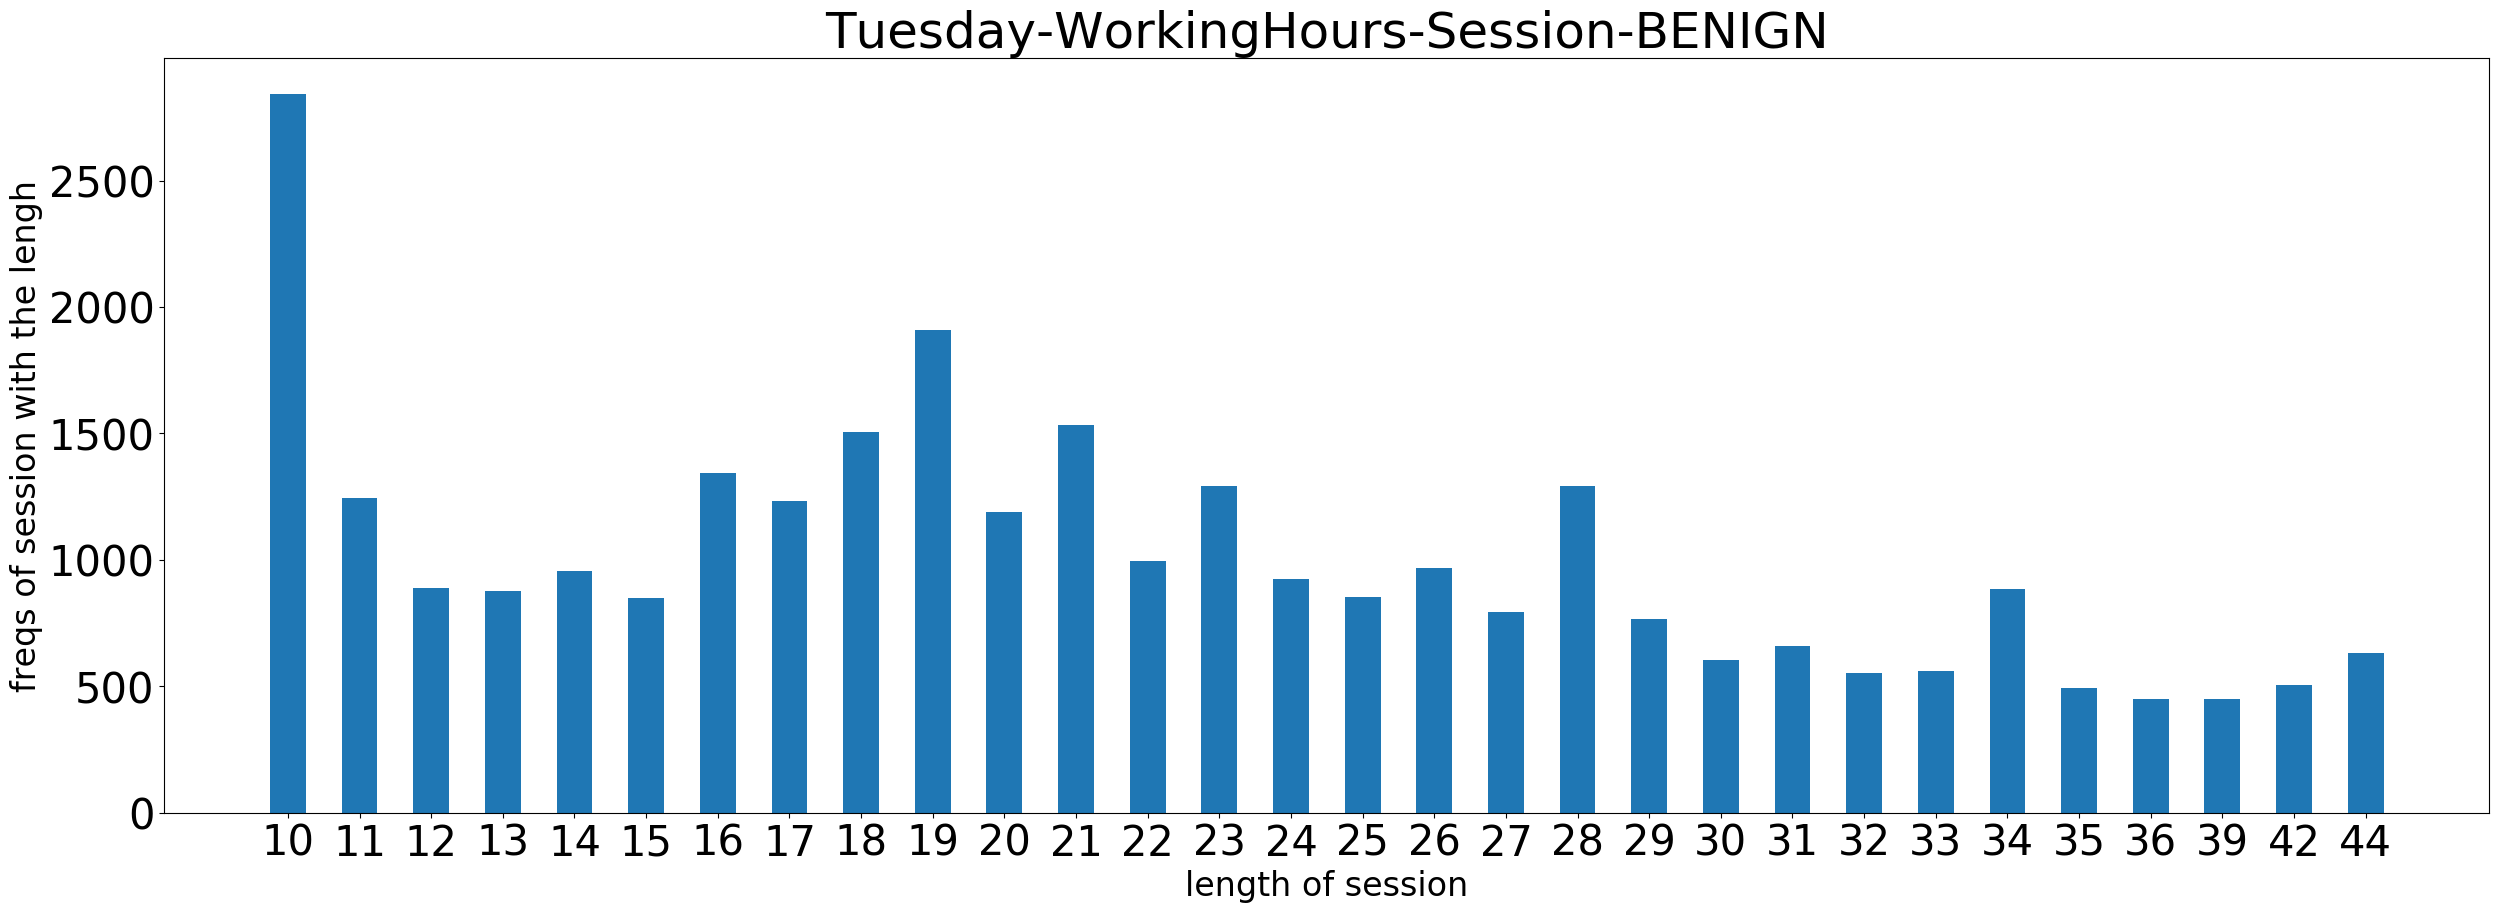

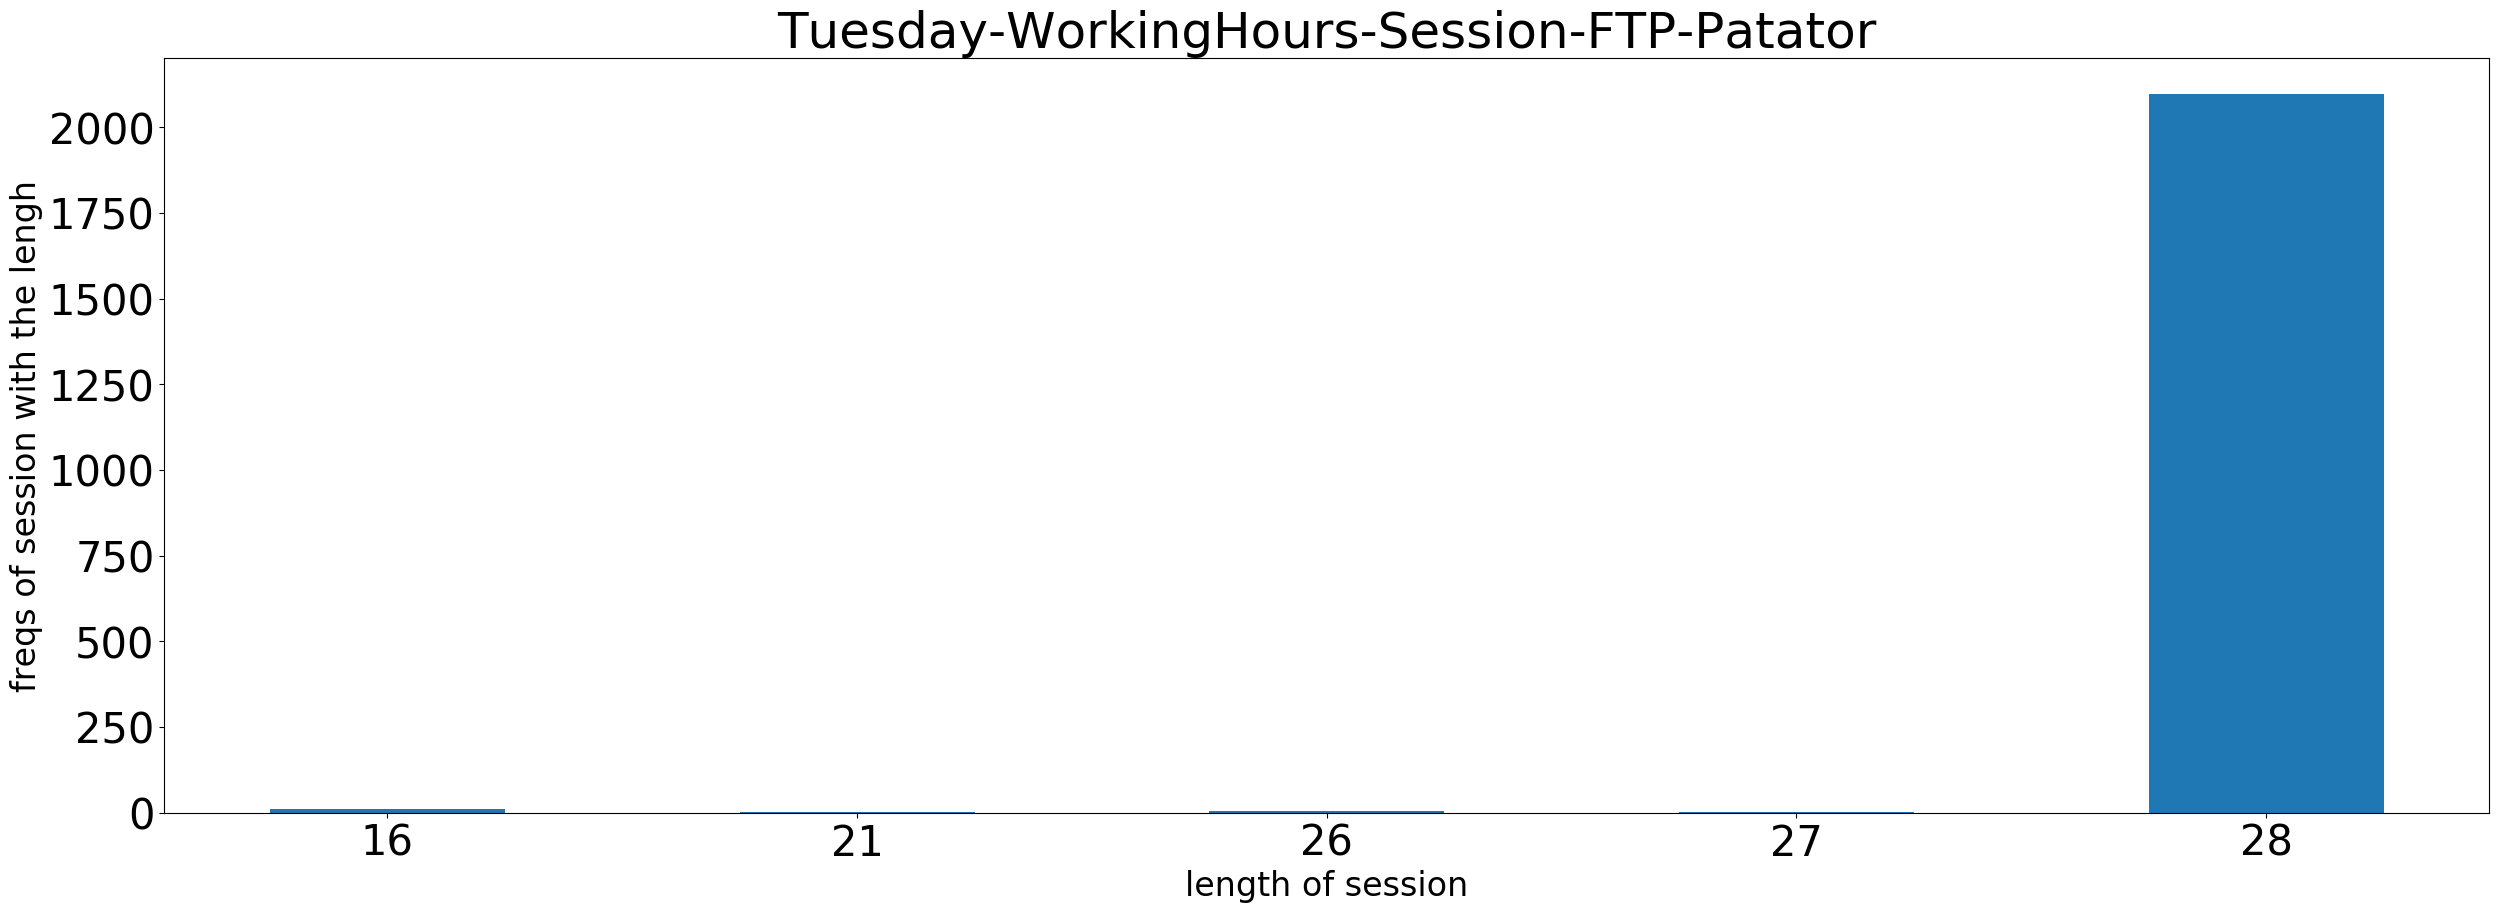

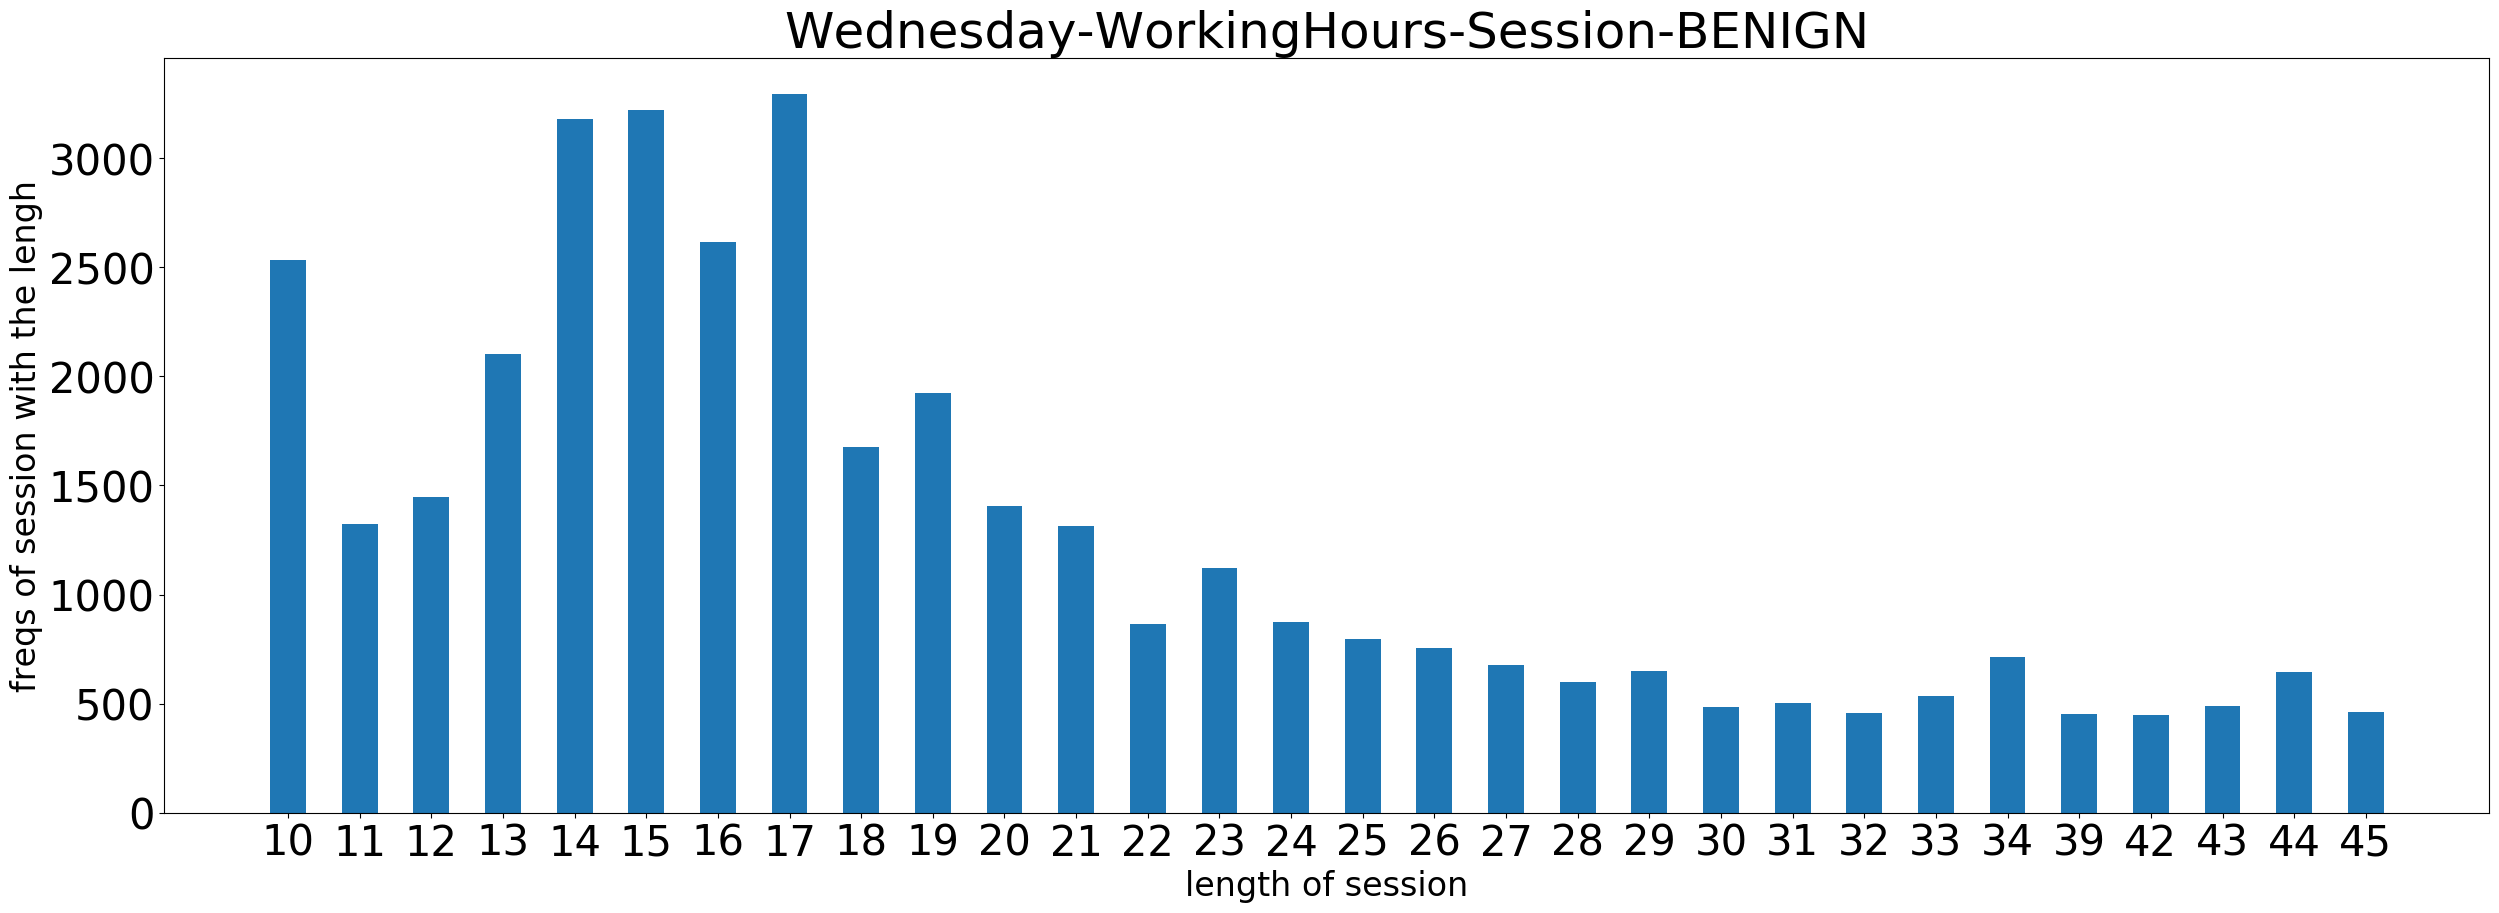

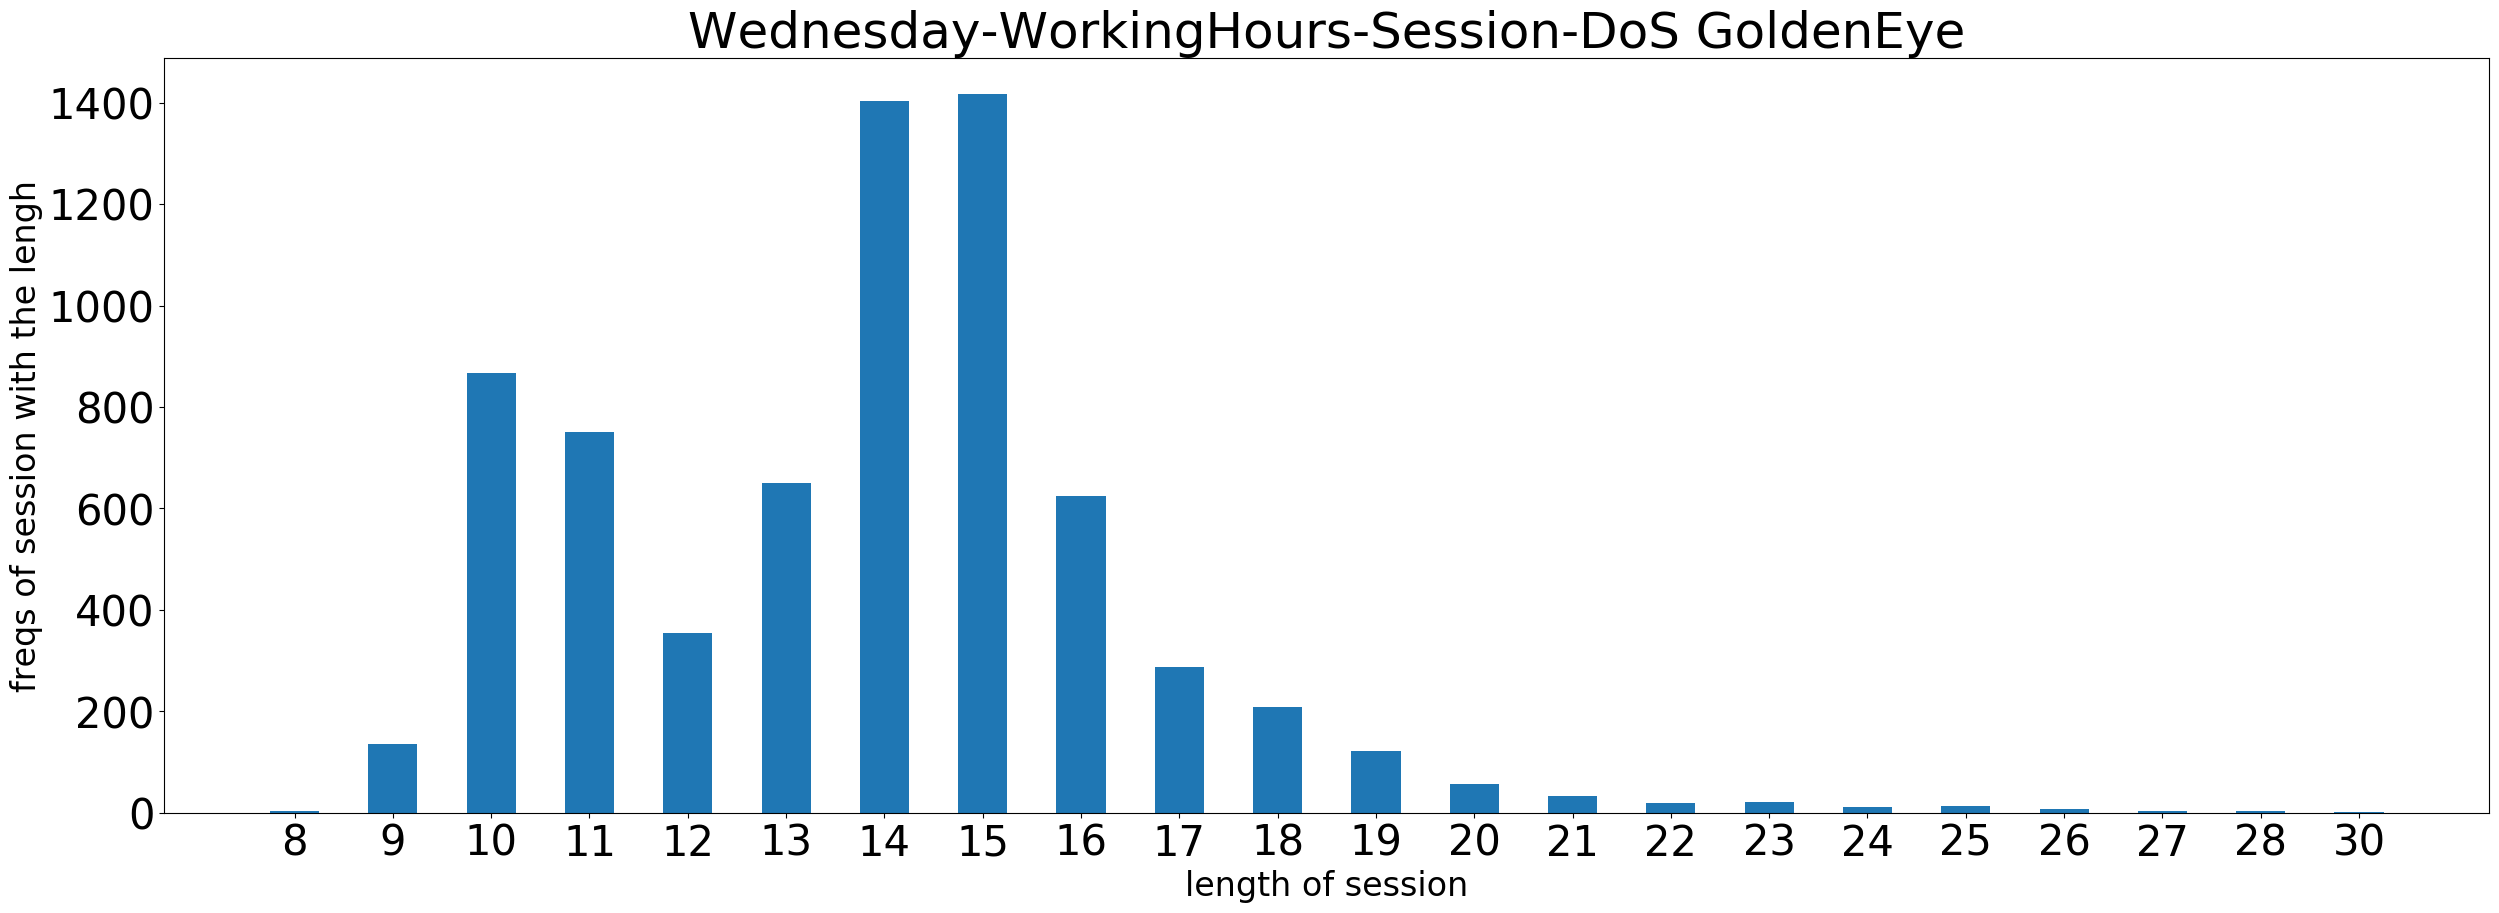

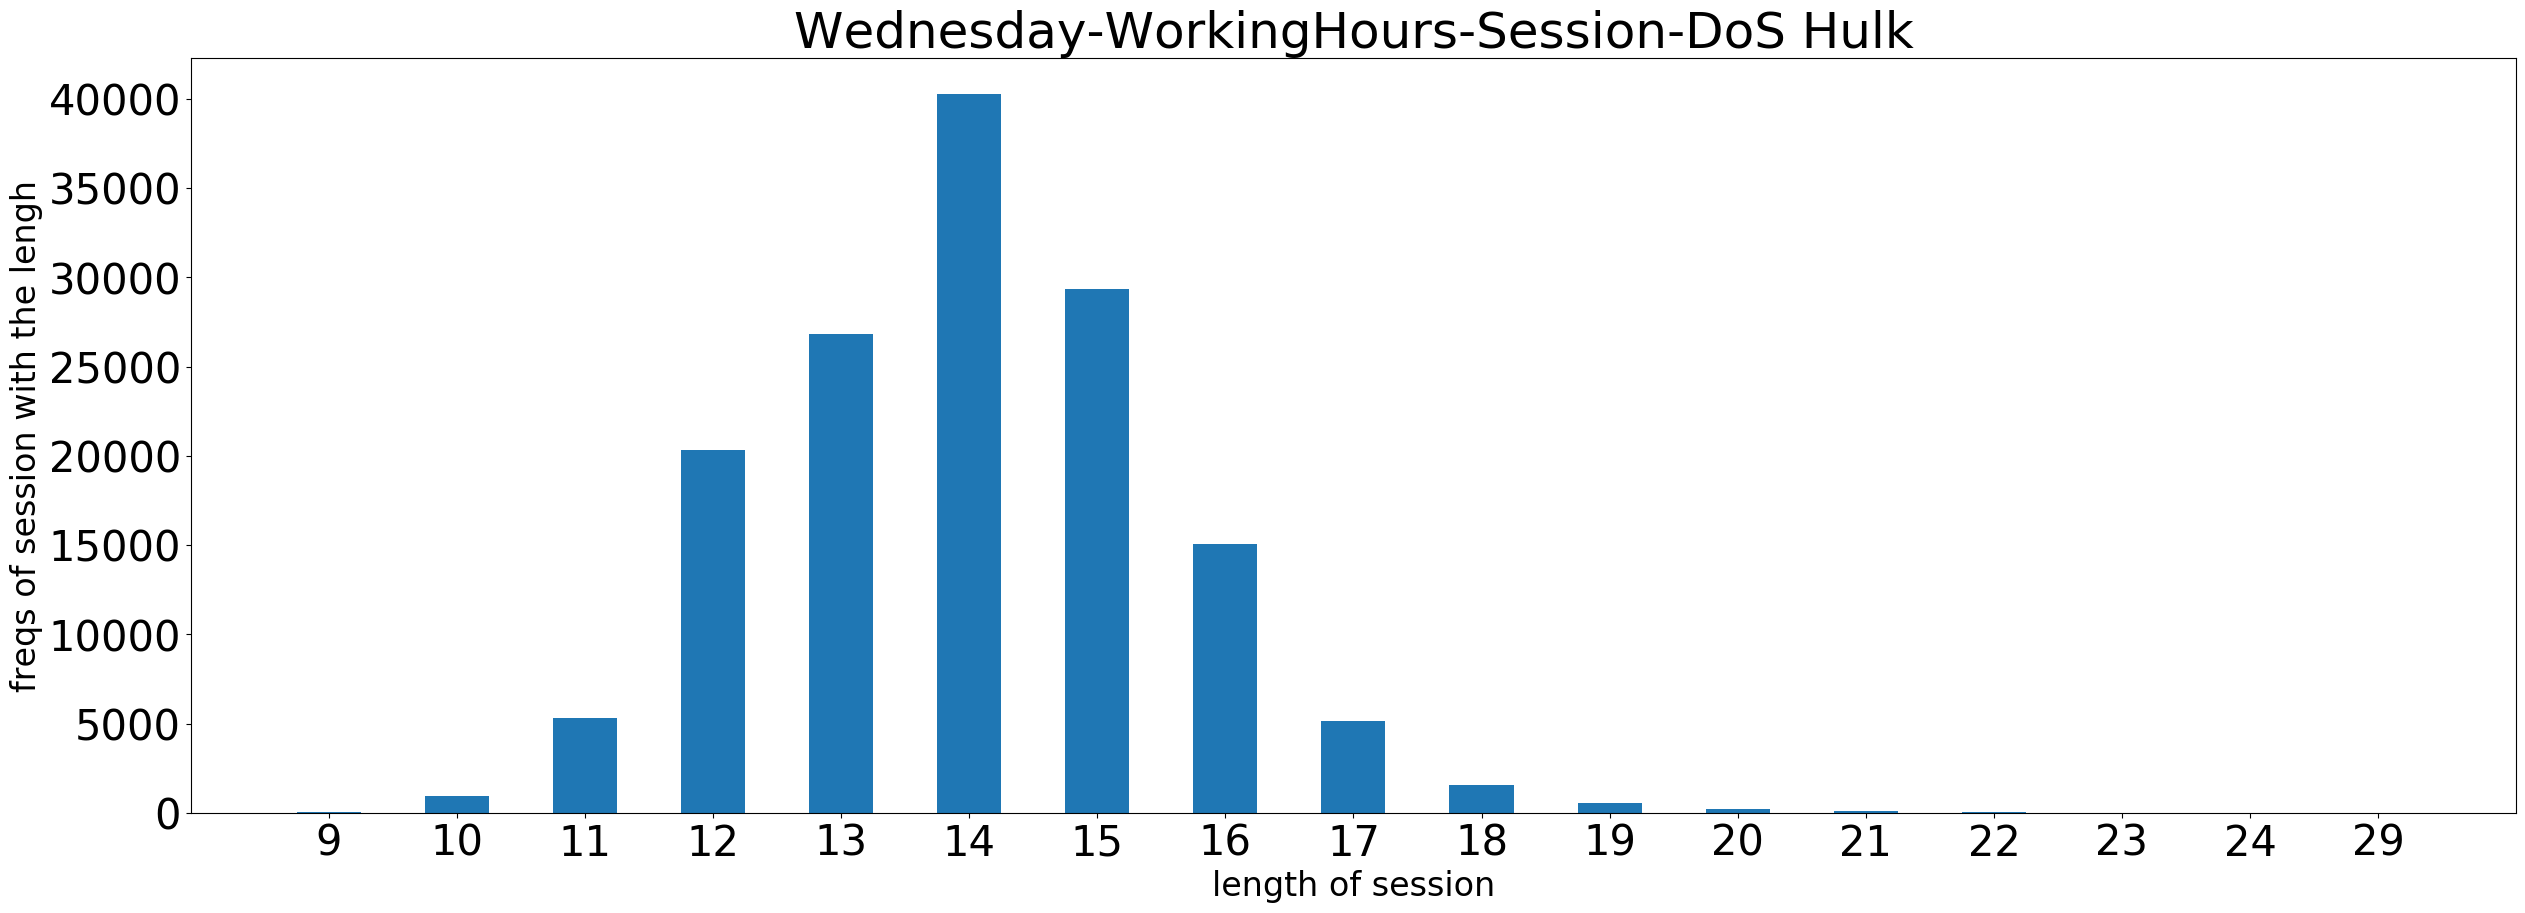

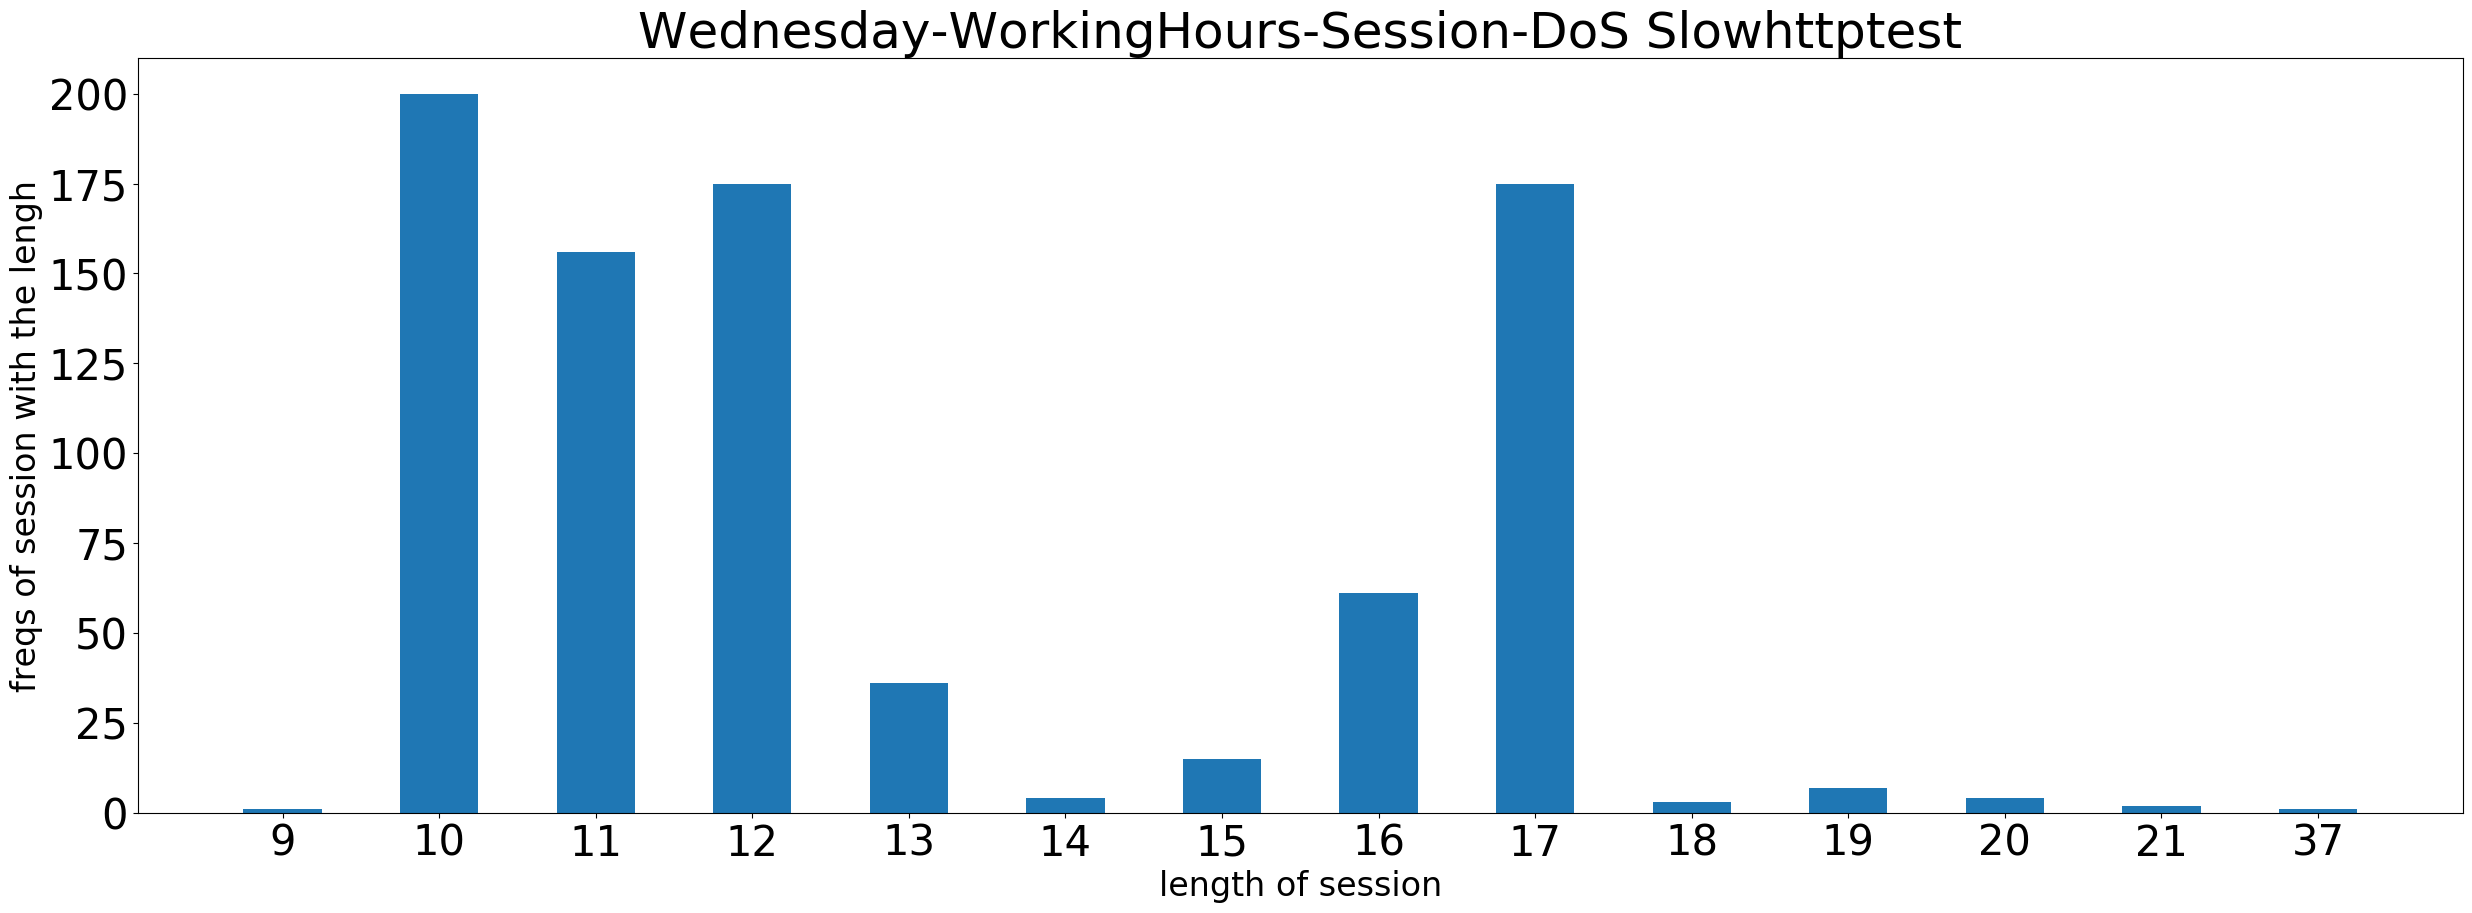

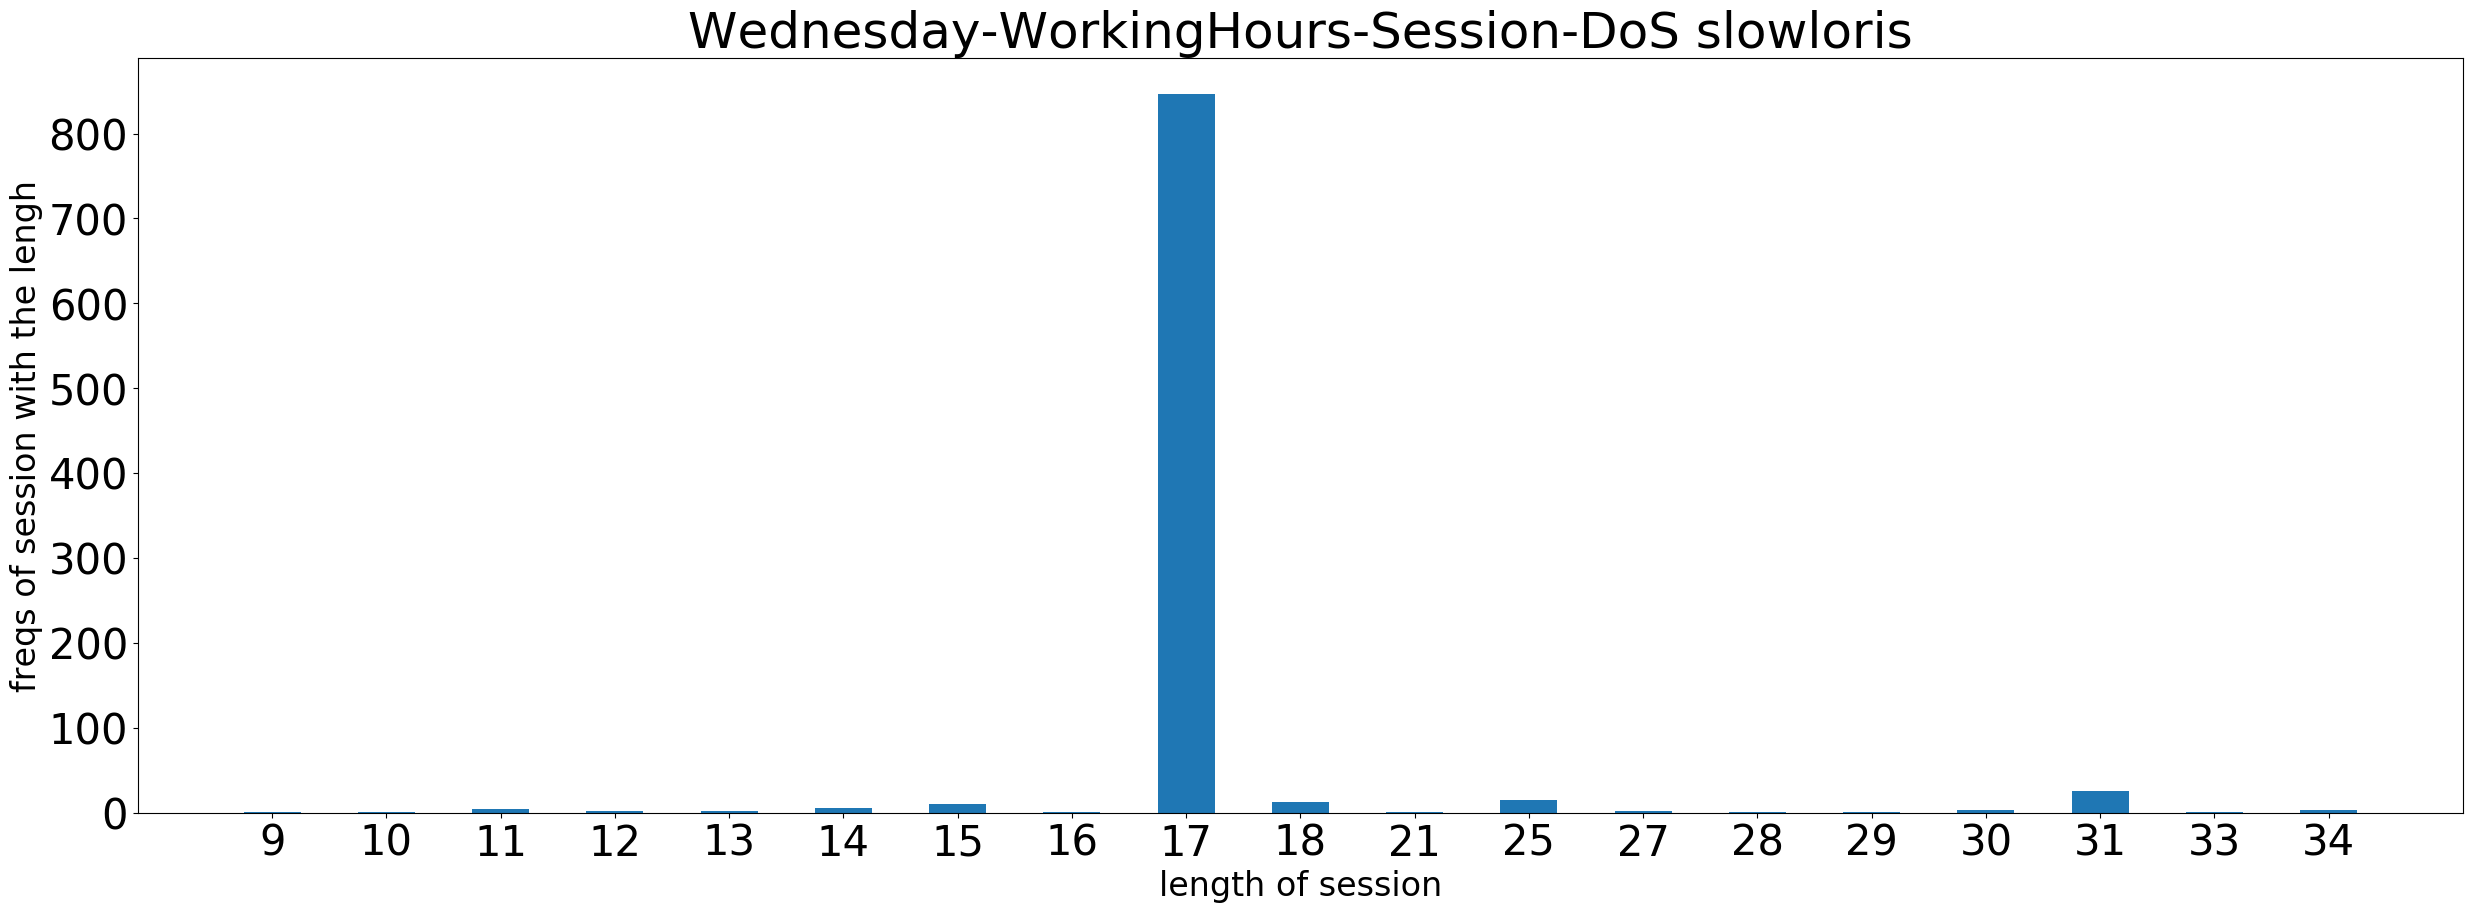

In [19]:
font1 = {'size' : 36}
font2 = {"size": 24}

for collection, dic in output.items():
    for label, freqs in dic.items():
        top_freqs = Counter(freqs).most_common(30)
        top_freqs = sorted(top_freqs, key = lambda info: info[0])
        length = [info[0] for info in top_freqs]
        length_ = list(range(len(length)))
        freqs = [info[1] for info in top_freqs]
        fig = plt.figure(figsize = (30, 10), dpi = 100)
        plt.title(collection + "-" + label, font1)
        plt.xlabel("length of session", font2)
        plt.ylabel("freqs of session with the lengh", font2)
        plt.bar(length_, freqs, width=0.5)
        plt.xticks(length_, length)
        plt.tick_params(labelsize=30)
        # plt.show()
        plt.savefig(os.path.join(pre_picture_path, "session's length of " + label))
    

In [57]:
def combine(input):
    output = dict()
    for collection, collection_info in input.items():
        for label, label_info in collection_info.items():
            if output.get(label) == None:
                output[label] = label_info
            else:
                for length, count in label_info.items():
                    output[label][length] += dic[label].get(length, 0) + count
    return output

In [58]:
session_length = combine(output)

In [59]:
len(session)

10

In [60]:
from numpy import mean

In [72]:
def statistical(input):
    output = dict()
    for label, info in input.items():
        output[label] = dict()
        output[label]['mode'] = Counter(info).most_common(1)[0][0]
        output[label]['max'] = max(list(info.keys()))
        output[label]["mean"] = sum([k*v for k, v in info.items()]) / sum(list(info.values()))
    return output
        

In [73]:
session_length_statistical = statistical(session_length)

In [76]:
sum([k*v for k,v in session_length["BENIGN"].items()])

1897360658

In [77]:
sum(list(session_length["BENIGN"].values()))

1455035

In [74]:
session_length_statistical

{'BENIGN': {'mode': 17, 'max': 9708, 'mean': 1303.9965760273808},
 'Bot': {'mode': 11, 'max': 125, 'mean': 35.577235772357724},
 'DDoS': {'mode': 13, 'max': 25, 'mean': 13.25555156139476},
 'PortScan': {'mode': 14, 'max': 21, 'mean': 12.28},
 'Infiltration': {'mode': 843, 'max': 843, 'mean': 428.0},
 'Web Attack  Brute Force': {'mode': 10,
  'max': 311,
  'mean': 156.30344827586208},
 'Web Attack  Sql Injection': {'mode': 10,
  'max': 12,
  'mean': 10.444444444444445},
 'Web Attack  XSS': {'mode': 310, 'max': 321, 'mean': 220.17391304347825},
 'FTP-Patator': {'mode': 28, 'max': 28, 'mean': 27.93339631554086},
 'DoS GoldenEye': {'mode': 15, 'max': 30, 'mean': 13.794538175579067},
 'DoS Hulk': {'mode': 14, 'max': 29, 'mean': 13.992577907957827},
 'DoS Slowhttptest': {'mode': 10, 'max': 37, 'mean': 12.941666666666666},
 'DoS slowloris': {'mode': 17, 'max': 34, 'mean': 17.578891257995735}}

In [78]:
import numpy as np

In [152]:
x = np.arange(len(session_length_statistical) - 2)
_mean, _mode, _max = [], [], []
tick_label = []
for label, info in session_length_statistical.items():
    if label == "BENIGN" or label == "Infiltration":
        continue
    _mean.append(info["mean"])
    _mode.append(info["mode"])
    _max.append(info["max"])
    tick_label.append(label)
_mean = np.array(_mean)
_mode = np.array(_mode)
_max = np.array(_max)

In [93]:
_mean

array([ 35.57723577,  13.25555156,  12.28      , 156.30344828,
        10.44444444, 220.17391304,  27.93339632,  13.79453818,
        13.99257791,  12.94166667,  17.57889126])

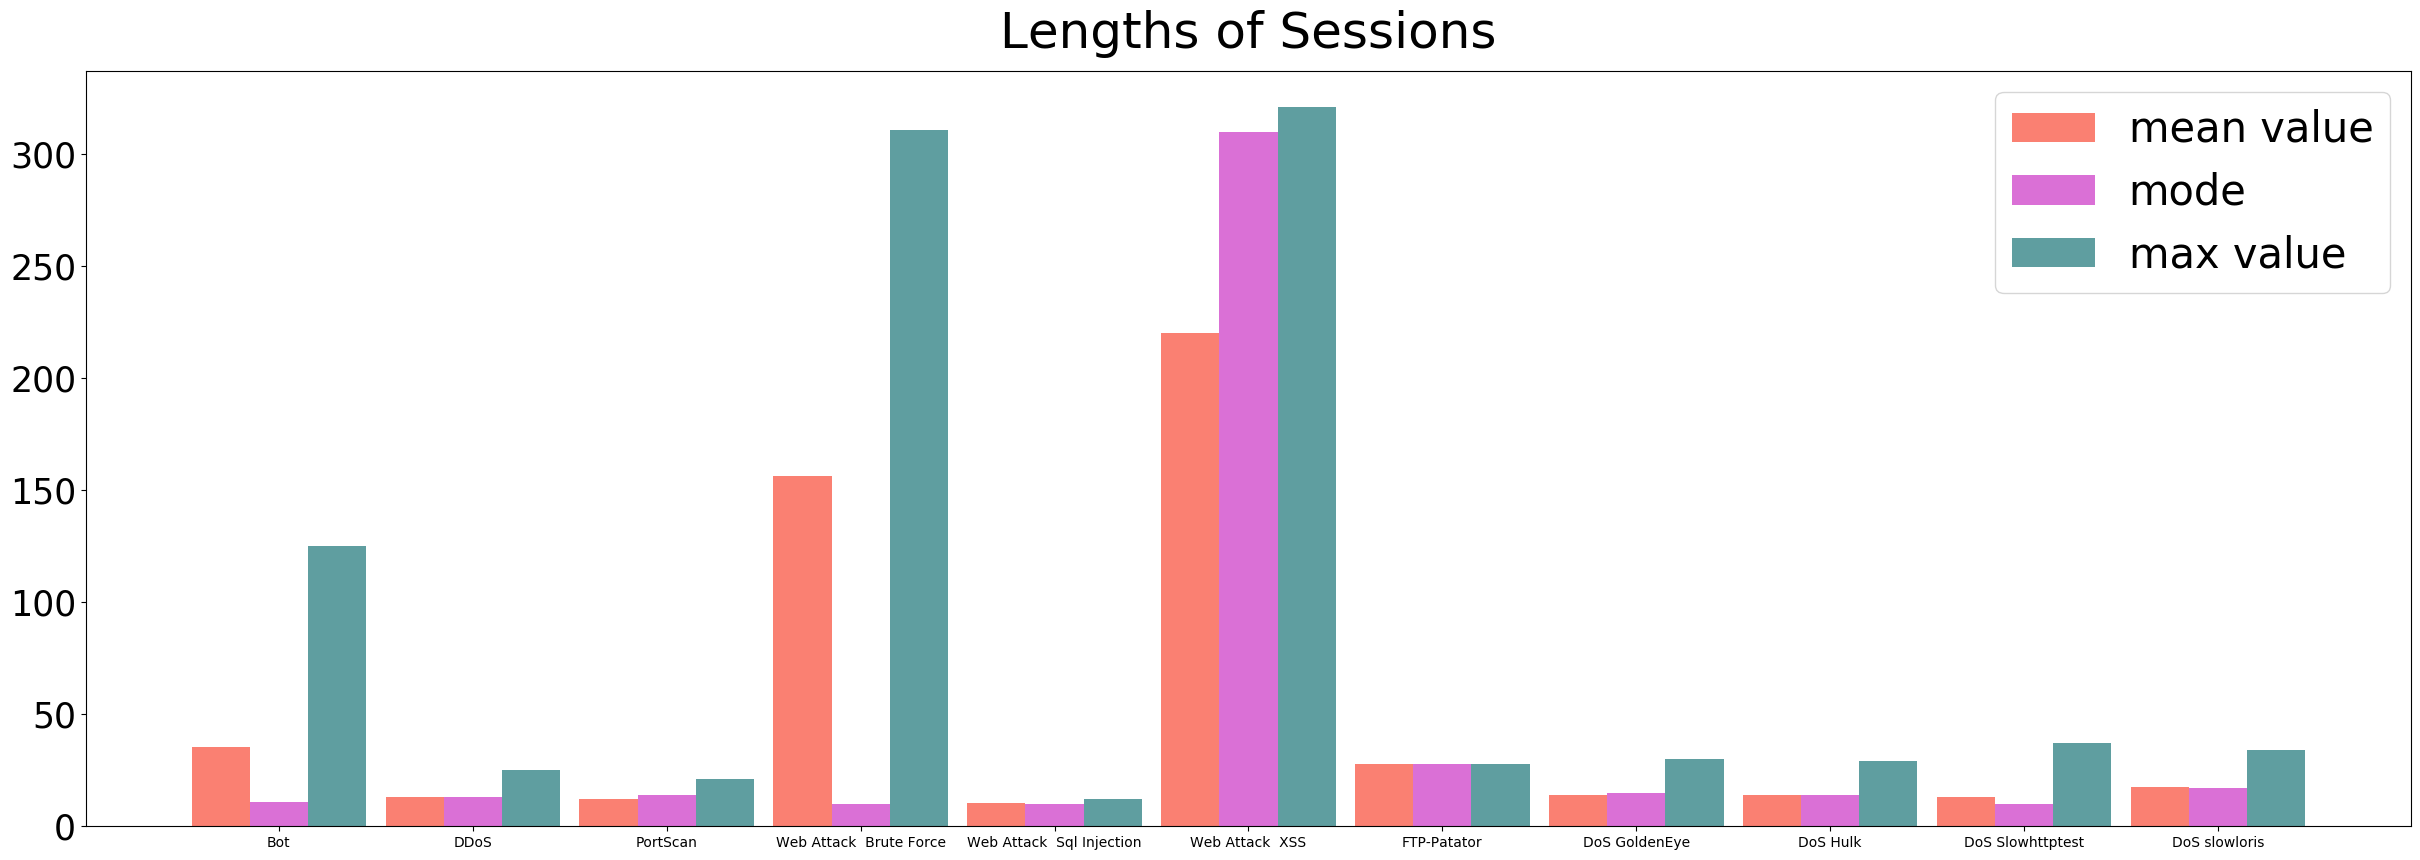

In [153]:
fig = plt.figure(figsize = (30, 10), dpi = 100)
bar_width = 0.3
plt.bar(x, _mean, bar_width, color = "salmon", label="mean value")
plt.bar(x+bar_width, _mode, bar_width, color = "orchid", label="mode")
plt.bar(x+2*bar_width, _max, bar_width, color = "cadetblue", label="max value")

legend = plt.legend(prop={'size': 30})
#legend.get_title().set_fontsize(fontsize = 100)

plt.title("Lengths of Sessions", fontsize = 36, y=1.02)
plt.tick_params(labelsize = 25)
plt.xticks(x + bar_width, tick_label, fontsize = 10)

# plt.show()
plt.savefig(os.path.join(pre_picture_path, "Lengths of Sessions"))

In [128]:
bytes_length = dict()
for collection in collections:
    labels = db[collection].distinct("label")
    for label in labels:
        print(label)
        if bytes_length.get(label) == None:
            bytes_length[label] = {}
        sessions = db[collection].find({"label": label}, {"_id": 0})
        for session in sessions:
            for _bytes in session["bytes_head"]:
                bytes_length[label][len(_bytes)//2] = bytes_length[label].get(len(_bytes)//2, 0) + 1

BENIGN
Bot
DDoS
PortScan
BENIGN
Infiltration
Web Attack  Brute Force
Web Attack  Sql Injection
Web Attack  XSS
BENIGN
FTP-Patator
BENIGN
DoS GoldenEye
DoS Hulk
DoS Slowhttptest
DoS slowloris


In [ ]:
def statistical(input):
    output = dict()
    for label, info in input.items():
        output[label] = dict()
        output[label]['mode'] = Counter(info).most_common(1)[0][0]
        output[label]['max'] = max(list(info.keys()))
        output[label]["mean"] = sum([k*v for k, v in info.items()]) / sum(list(info.values()))
    return output

In [136]:
bytes_length_statistical = statistical(bytes_length)

In [137]:
bytes_length_statistical

{'BENIGN': {'mode': 60, 'max': 24874, 'mean': 630.7891763720575},
 'DoS GoldenEye': {'mode': 66, 'max': 11698, 'mean': 717.815613734984},
 'DoS Hulk': {'mode': 66, 'max': 11661, 'mean': 864.0556671682757},
 'DoS Slowhttptest': {'mode': 66, 'max': 4410, 'mean': 289.0068311843566},
 'DoS slowloris': {'mode': 297, 'max': 5858, 'mean': 197.0932461123544},
 'Bot': {'mode': 60, 'max': 23414, 'mean': 1214.6444241316271},
 'DDoS': {'mode': 60, 'max': 11649, 'mean': 939.1428635163968},
 'PortScan': {'mode': 66, 'max': 5858, 'mean': 730.728338762215},
 'Infiltration': {'mode': 60, 'max': 1514, 'mean': 205.44158878504672},
 'Web Attack  Brute Force': {'mode': 66,
  'max': 5858,
  'mean': 432.97189375220614},
 'Web Attack  Sql Injection': {'mode': 66,
  'max': 4215,
  'mean': 321.3723404255319},
 'Web Attack  XSS': {'mode': 66, 'max': 7992, 'mean': 801.5057266982623},
 'FTP-Patator': {'mode': 66, 'max': 115, 'mean': 77.1384797497252}}

In [139]:
x = np.arange(len(bytes_length_statistical))
_mean, _mode = [], []
tick_label = []
for label, info in bytes_length_statistical.items():
    _mean.append(info["mean"])
    _mode.append(info["mode"])
    tick_label.append(label)
_mean = np.array(_mean)
_mode = np.array(_mode)

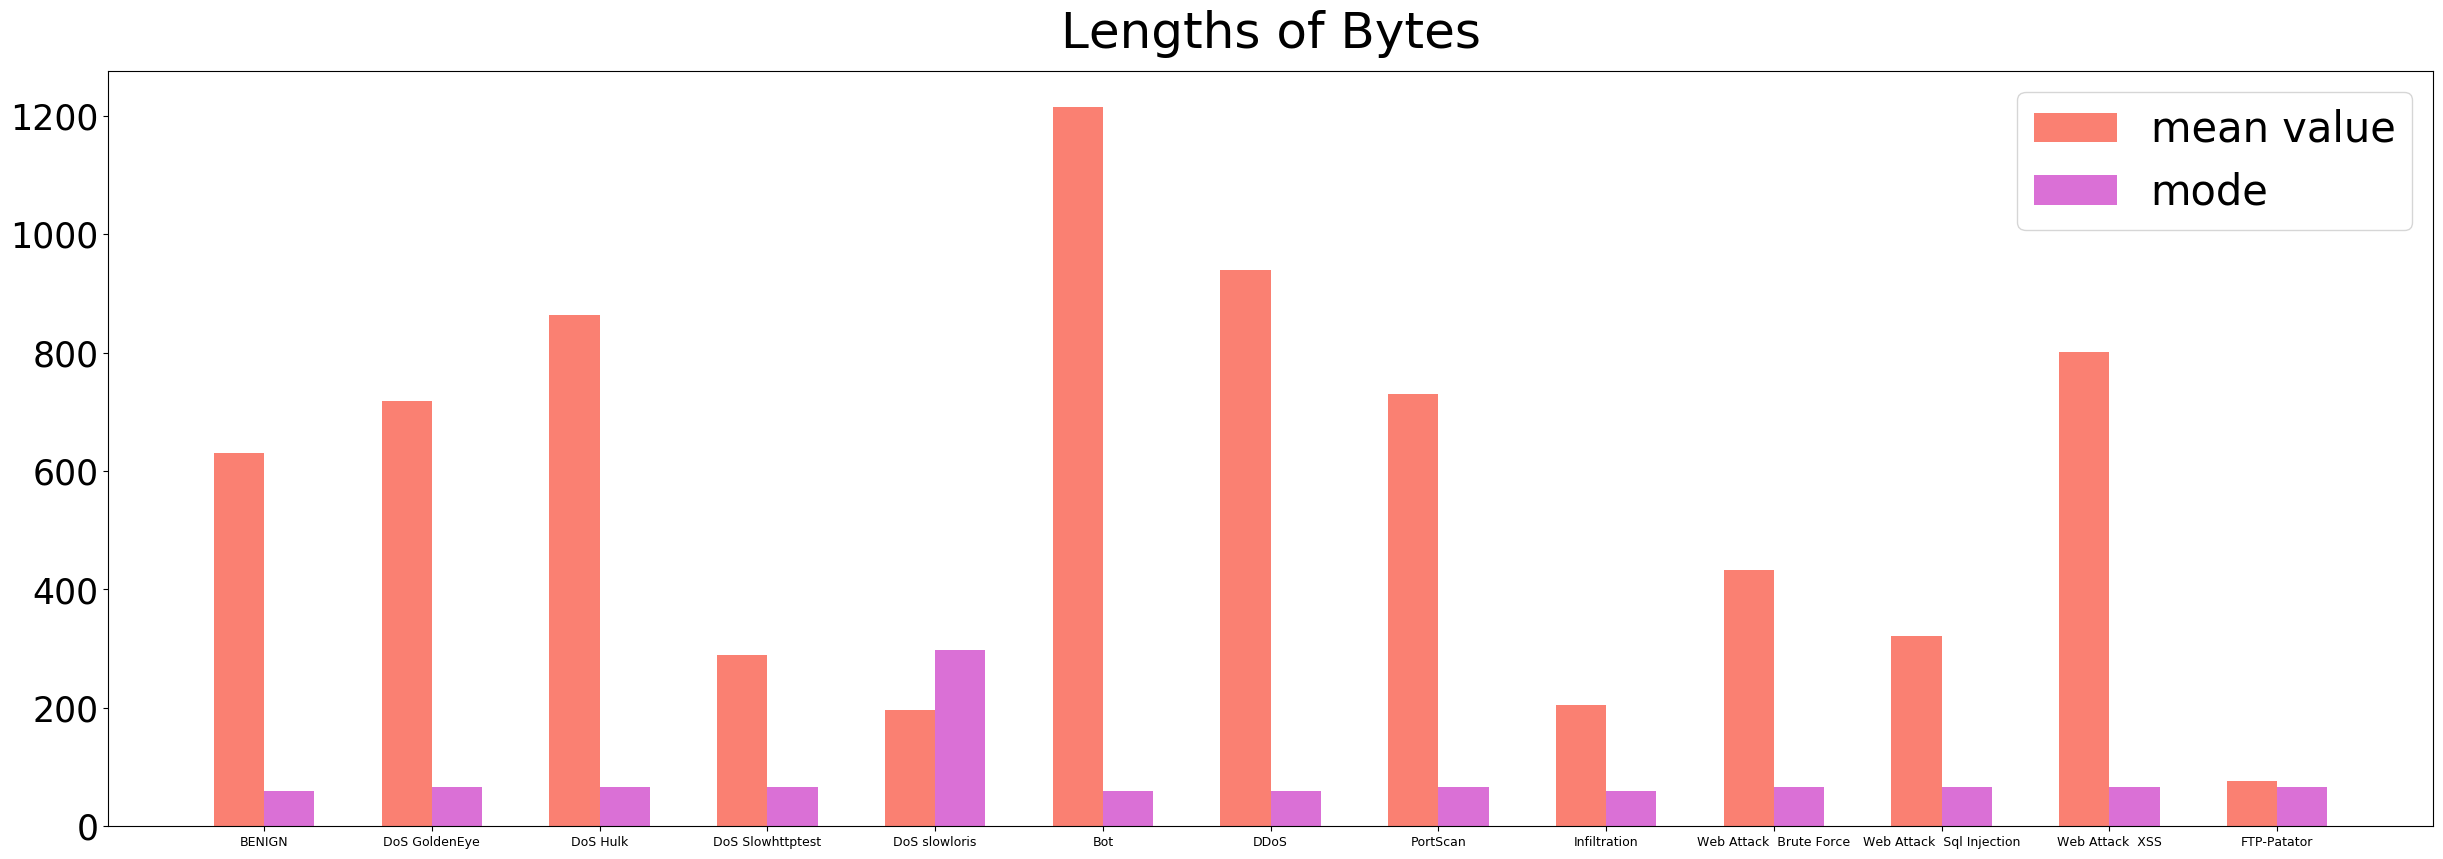

In [150]:
fig = plt.figure(figsize = (30, 10), dpi = 100)
bar_width = 0.3
plt.bar(x, _mean, bar_width, color = "salmon", label="mean value")
plt.bar(x+bar_width, _mode, bar_width, color = "orchid", label="mode")

legend = plt.legend(prop={'size': 30})
#legend.get_title().set_fontsize(fontsize = 100)

plt.title("Lengths of Bytes", fontsize = 36, y=1.02)
plt.tick_params(labelsize = 25)
plt.xticks(x + bar_width/2, tick_label, fontsize = 9)
# plt.show()
plt.savefig(os.path.join(pre_picture_path, "Lengths of Bytes"))